### Information on the Credit EDA Assignment

In [1]:
# Problem Statement:
# For any bank or financial institution, while making decision on approving or rejecting a loan, there are 2 risks considered.
    # 1. If loan refused to an applicant who might be likely to repay, it can result in a potential loss to the lending business.
    # 2. If loan approved for an applicant who is likely to default, it can result in a loss in financial terms against that loan.

# Goal:
# Identify patterns/scenarios/correlations where
    # 1. a client capable of repaying the loan is not rejected
    # 2. a client having difficulty paying instalments, to take actions such as, 
        # denying a loan, 
        # reducing loan amount, 
        # lending at higher interest rate

# Target variable: 
# clients with payment difficulties and all other cases.

# Dataset contents:
# application_data    : information of clients at the time of application, whether a client has payment difficulties.
# previous_application: information about client’s previous loan data, whether it was Approved/Cancelled/Refused/Unused.


### Importing Required Libraries

In [2]:
# libaries for numerical operations and handling dataframes
import numpy as np, pandas as pd

# libraries to plot various graphs for data analysis
import matplotlib.pyplot as plt, seaborn as sns

# to plot and save graphs within jupyter notebook
%matplotlib inline

In [3]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import sys: it might be needed in cases such as setting recursion limit
import sys

### Reading and Understanding the datasets

In [5]:
# Read both datasets one by one
# Check basic information with head/tail, shape, index, columns, dtype(s), value_counts, unique, isnull methods/attributes
# 
# Insights

In [6]:
# check display options
# print(pd.get_option('display.max_rows'))
# print(pd.get_option('display.max_info_rows'))
# print(pd.get_option('display.max_columns'))
# print(pd.get_option('display.max_info_columns'))

# set options for displaying rows and columns as needed
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 200)

#### Understanding datasets: Function Definitions

In [7]:
# define a function to display names of numerical type columns of a dataset
def dispNumCols (dataFrame):
    numColList=[]
    numColCount=0
    for col in dataFrame.columns:
        if dataFrame[col].dtype != 'object' and dataFrame[col].dtype != 'category':
            numColCount+=1
            numColList.append(col)
    print('\nThere are {} numerical columns in the dataset'.format(numColCount))
    return numColList

In [8]:
# define a function to display names of object/category type columns of a dataset
def dispCatCols (dataFrame):
    catColList=[]
    catColCount=0
    for col in dataFrame.columns:
        if dataFrame[col].dtype == 'object' or dataFrame[col].dtype == 'category':
            catColCount+=1
            catColList.append(col)
    print('\nThere are {} categorical columns in the dataset'.format(catColCount))
    return catColList

In [9]:
# define a function to display unique values in object/categorical type columns of a dataset
def dispCatUniqueVal (dataFrame):
    for col in dataFrame.columns:
        if dataFrame[col].dtype == 'object':
            print('number of unique values in {} column are: {}\n'.format(col, dataFrame[col].nunique()))
            print('values counts in {} column are:\n{}\n\n'.format(col, dataFrame[col].value_counts()))

#### Read Application dataset

In [10]:
# read the application dataset
application_df = pd.read_csv(r'Credit_EDA_Datasets/application_data.csv')

In [11]:
# look at the first 5 records in application dataset
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [12]:
# check the shape of application dataset
application_df.shape

(307511, 122)

In [13]:
# There are more than 3 lac records and each record has 122 features/variables

In [14]:
# check the data types of variables in application dataset
application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [15]:
# We have a mix of numerical and categorical type columns

In [16]:
# check number of numerical type columns in application dataset
appl_NumCols = dispNumCols(application_df)


There are 106 numerical columns in the dataset


In [17]:
appl_NumCols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [18]:
# check number of object type columns in application dataset
appl_CatCols = dispCatCols(application_df)


There are 16 categorical columns in the dataset


In [19]:
appl_CatCols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [20]:
# There are 106 numerical and 16 categorical columns

In [21]:
# look at the unique values of all categorical columns
dispCatUniqueVal(application_df)

number of unique values in NAME_CONTRACT_TYPE column are: 2

values counts in NAME_CONTRACT_TYPE column are:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


number of unique values in CODE_GENDER column are: 3

values counts in CODE_GENDER column are:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


number of unique values in FLAG_OWN_CAR column are: 2

values counts in FLAG_OWN_CAR column are:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


number of unique values in FLAG_OWN_REALTY column are: 2

values counts in FLAG_OWN_REALTY column are:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


number of unique values in NAME_TYPE_SUITE column are: 7

values counts in NAME_TYPE_SUITE column are:
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group o

In [22]:
# A few categories as 'XNA' observed in a few categorical columns
# A category 'Unknown' observed in one of the columns

In [23]:
# Look at general information of the application dataset
application_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [24]:
# There is a considerable number of columns with null values

In [25]:
# Check description of numerical columns in application dataset
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [26]:
#
# A few outliers might be present 
# e.g. 
# max value is 19 in CNT_CHILDREN
# max value is 20 in CNT_FAM_MEMBERS
# max AMT_ANNUITY is quite high as compared to its 75th percentile
# max AMT_REQ_CREDIT_BUREAU_QRT is quite high as 261
# 
# Columns with DAYS information can be converted into years for a better analysis-worthy value
# e.g. DAYS_BIRTH and DAYS_EMPLOYED are better represented in years than days
# 
# Mostly, more than 75 percentile of clients have shared their documents
# 

In [27]:
# Check description of categorical columns in application dataset
application_df.describe(include=['object'])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [28]:
# 
# It can be seen which are the values mostly occuring in a categorical column
# e.g.
# Most commonly, the clients have applied for Cash loans
# Most commonly, the applicants are female clients
# Most commonly, the clients don't own a car but at the same time most of the clients own a property
# Married clients are the most common who applied for any loan
# Clients with Seconday level education are the most common in the applicants list
# 

#### Read Previous Application dataset

In [29]:
# read the previous application dataset
previous_df = pd.read_csv(r'Credit_EDA_Datasets/previous_application.csv')

In [30]:
# look at the first 5 records in previous application dataset
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [31]:
# check the shape of previous application dataset
previous_df.shape

(1670214, 37)

In [32]:
# There are more than 16 lac records and each record has 37 features/variables

In [33]:
# check the data types of variables in previous application dataset
# previous_df.dtypes
previous_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [34]:
# We have a mix of numerical and categorical type columns

In [35]:
# check number of numerical type columns in previous application dataset
prev_NumCols = dispNumCols(previous_df)


There are 21 numerical columns in the dataset


In [36]:
prev_NumCols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [37]:
# check number of categorical type columns in previous application dataset
prev_CatCols = dispCatCols(previous_df)


There are 16 categorical columns in the dataset


In [38]:
prev_CatCols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [39]:
# There are 21 numerical and 16 categorical columns

In [40]:
# look at the unique values of all categorical columns
dispCatUniqueVal(previous_df)

number of unique values in NAME_CONTRACT_TYPE column are: 4

values counts in NAME_CONTRACT_TYPE column are:
NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64


number of unique values in WEEKDAY_APPR_PROCESS_START column are: 7

values counts in WEEKDAY_APPR_PROCESS_START column are:
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64


number of unique values in FLAG_LAST_APPL_PER_CONTRACT column are: 2

values counts in FLAG_LAST_APPL_PER_CONTRACT column are:
FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64


number of unique values in NAME_CASH_LOAN_PURPOSE column are: 25

values counts in NAME_CASH_LOAN_PURPOSE column are:
NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                        

In [41]:
# A few categories as 'XNA' and 'XAP' observed in a few categorical columns
# A category 'Other' observed in few columns

In [42]:
# Look at general information of the previous application dataset
previous_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [43]:
# There is a considerable number of columns with null values, some with very high number of missing values

In [44]:
# Check description of numerical columns in previous dataset
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [45]:
#
# A few outliers might be present
# e.g. 
# max value is approx 69 lacs in AMT_APPLICATION and AMT_CREDIT
# max value is approx 4 lacs in AMT_ANNUITY
# The above combination could be a normal exceptional case too.
# 
# Upto 50th percentile of clients had requested for a loan within approx 70,000
# but at the same time, upto 50th percentile of clients received a credit within approx 80,000
# 
# Clients within 75th percentile had paid the down payment only within 10%
# 
# Nearly 25 percentile of applicants had bought an insurance with their loan

In [46]:
# Check description of categorical columns in previous dataset
previous_df.describe(include=['object'])

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

In [47]:
# 
# It can be seen which are the values mostly occuring in a categorical column
# e.g.
# Most commonly, the clients had applied for Cash loans
# Most commonly, the applicantions were approved
# Most commonly, the clients were repeaters, i.e. they had applied for loans in the past as well.
# 

### Data Cleaning
    Various phases of data cleaning, not necessarily in sequence and not all needed everytime !
    
    Identifying the data types
    Fixing the rows and columns
    Imputing/removing missing values
    Handling outliers
    Standardising the values
    Fixing invalid values
    Filtering the data

#### Data Cleaning: Function Definitions

In [48]:
# define a function to return null values in a dataset columns
# Also, it can be useful when we need to see null values during data cleaning from time to time
def dispNullValues (DataFrame):
    return ( DataFrame.isnull().sum().sort_values(ascending=False) )

In [49]:
# define a function to return percetage null values in a dataset columns
# Also, it can be useful when we need to see null values during data cleaning from time to time
def dispPercentNullValues (DataFrame):
    PercentMissing = round( ( (DataFrame.isnull().sum()/len(DataFrame) )*100 ), 2)
    PercentMissing = PercentMissing.sort_values(ascending=False)
    return PercentMissing

#### Discard the columns with null values more than a particular range

##### Application dataset

In [50]:
# check missing/null values in application dataset
dispNullValues(application_df)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [51]:
# Look at percentage of missing values in each column of application dataset
applPercentNull = dispPercentNullValues(application_df)
applPercentNull

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [52]:
# The columns with >45% null values are not going to be so fit for the data analysis
# Check for columns in application dataset with >45% missing values
len(applPercentNull[applPercentNull>45])

49

In [53]:
# There are 49 columns in application dataset with >45% missing values

In [54]:
# Except EXT_SOURCE_1, most of these columns have information about the clients building, that's not so relevant for the analysis
# discard the columns in application dataset with >45% missing values
application_df = application_df[applPercentNull[applPercentNull<45].index]
application_df.shape

(307511, 73)

In [55]:
# application dataset now has 73 columns out of initial 122.

##### Previous Application dataset

In [56]:
# check missing/null values in previous application dataset
dispNullValues(previous_df)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [57]:
# Look at percentage of missing values in each column of application dataset
prevPercentNull = dispPercentNullValues(previous_df)
prevPercentNull

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [58]:
# The columns with >40% null values are not going to be so fit for the data analysis
# Check for columns in previous application dataset with >40% missing values
len(prevPercentNull[prevPercentNull>40])

11

In [59]:
# There are 11 columns in previous application dataset with >40% missing values

In [60]:
# discard the columns in previous application dataset with >40% missing values
previous_df = previous_df[prevPercentNull[prevPercentNull<40].index]
previous_df.shape

(1670214, 26)

In [61]:
# previous application dataset now has 26 columns out of initial 37.

##### Merge both the datasets & Discard Irrelevant columns

In [62]:
# At this stage, this datasets are ready to be merged with initial cleaning.

In [63]:
# Merge both the datasets
# Type of merge is INNER, which selects all the records which are present in both the datasets
# The client ID column SK_ID_CURR is the variable on which the merging can be performed.
appl_Merged_df = pd.merge(left=application_df, right=previous_df, how='inner', on='SK_ID_CURR')
appl_Merged_df.head()

OCCUPATION_TYPE  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
0        Laborers      0.139376                         0.0   
1      Core staff           NaN                         0.0   
2      Core staff           NaN                         0.0   
3      Core staff           NaN                         0.0   
4        Laborers      0.729567                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                         1.0   Unaccompanied                       2.0   
1                         0.0          Family                       0.0   
2                         0.0          Family                       0.0   
3                         0.0          Family                       0.0   
4                         0.0   Unaccompanied                       0.0   

   OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       1.0   
2                       1.0                       1.0   
3                       1.0                       1.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE_x  CNT_CHILDREN  \
0                       2.0      0.262949           351000.0             0   
1                       0.0      0.622246          1129500.0             0   
2                       0.0      0.622246          1129500.0             0   
3                       0.0      0.622246          1129500.0             0   
4                       0.0      0.555912           135000.0             0   

   FLAG_DOCUMENT_8 NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0                0           Cash loans           M            N   
1                0           Cash loans           F            N   
2                0           Cash loans           F            N   
3                0           Cash loans           F            N   
4                0      Revolving loans           M            Y   

   DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
0                 -1134.0                0                1                0   
1                  -828.0                0                1                0   
2                  -828.0                0                1                0   
3                  -828.0                0                1                0   
4                  -815.0                0                0                0   

   FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_21  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11 FLAG_OWN_REALTY  \
0                 0                 0                 0               Y   
1                 0                 0                 0               N   
2                 0                 0                 0               N   
3              

In [64]:
# check the shape of the merged dataset
appl_Merged_df.shape

(1413701, 98)

In [65]:
# There might be still some columns that are irrelevant for the data analysis for the given problem statement

In [66]:
# Look at the columns in the merged dataset
appl_Merged_df.columns.sort_values()

Index(['AMT_ANNUITY_x', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_x',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CHANNEL_TYPE', 'CNT_CHILDREN',
       'CNT_FAM_MEMBERS', 'CNT_PAYMENT', 'CODE_GENDER', 'CODE_REJECT_REASON',
       'DAYS_BIRTH', 'DAYS_DECISION', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_D

In [67]:
# Following columns are irrelevant for the data analysis for the given problem statement
# ToDo: Reasons can be added later
irrelevantColumns = [
'AMT_APPLICATION',
'AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y', 'NAME_GOODS_CATEGORY', 
'CHANNEL_TYPE',
'DAYS_DECISION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
'HOUR_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_y', 'WEEKDAY_APPR_PROCESS_START_x', 'WEEKDAY_APPR_PROCESS_START_y',
'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
'NAME_CLIENT_TYPE', 'NAME_TYPE_SUITE',
'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO',
'NAME_PRODUCT_TYPE', 'PRODUCT_COMBINATION', 
'REGION_POPULATION_RELATIVE',
'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
'SK_ID_CURR', 'SK_ID_PREV']

# Relevant columns can be found as following
relevantColumns = appl_Merged_df.drop(columns=irrelevantColumns, inplace=False).columns
print('Number of relevant columns is {}\n\nThe relevant columns are the following:\n\n{}'.format(len(relevantColumns), list(sorted(relevantColumns))))

Number of relevant columns is 36

The relevant columns are the following:

['AMT_ANNUITY_x', 'AMT_ANNUITY_y', 'AMT_CREDIT_x', 'AMT_CREDIT_y', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CNT_PAYMENT', 'CODE_GENDER', 'CODE_REJECT_REASON', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'TARGET']


In [68]:
# Look at the dataset now
appl_Merged_df = appl_Merged_df[sorted(relevantColumns)]
appl_Merged_df.head()

AMT_ANNUITY_x  AMT_ANNUITY_y  AMT_CREDIT_x  AMT_CREDIT_y  AMT_INCOME_TOTAL  \
0        24700.5       9251.775      406597.5      179055.0          202500.0   
1        35698.5      98356.995     1293502.5     1035882.0          270000.0   
2        35698.5      64567.665     1293502.5      348637.5          270000.0   
3        35698.5       6737.310     1293502.5       68053.5          270000.0   
4         6750.0       5357.250      135000.0       20106.0           67500.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
0                         0.0                         1.0             0   
1                         0.0                         0.0             0   
2                         0.0                         0.0             0   
3                         0.0                         0.0             0   
4                         0.0                         0.0             0   

   CNT_FAM_MEMBERS  CNT_PAYMENT CODE_GENDER CODE_REJECT_REASON  DAYS_BIRTH  \
0              1.0         24.0           M                XAP       -9461   
1              2.0         12.0           F                XAP      -16765   
2              2.0          6.0           F                XAP      -16765   
3              2.0         12.0           F                XAP      -16765   
4              1.0          4.0           M                XAP      -19046   

   DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3 FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           -637      0.262949      0.139376            N               Y   
1          -1188      0.622246           NaN            N               N   
2          -1188      0.622246           NaN            N               N   
3          -1188      0.622246           NaN            N               N   
4           -225      0.555912      0.729567            Y               Y   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE_x  \
0                    XAP             Approved           Cash loans   
1                    XNA             Approved           Cash loans   
2                    XAP             Approved           Cash loans   
3                    XAP             Approved           Cash loans   
4                    XAP             Approved      Revolving loans   

  NAME_CONTRACT_TYPE_y            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Consumer loans  Secondary / secondary special  Single / not married   
1           Cash loans               Higher education               Married   
2       Consumer loans               Higher education               Married   
3       Consumer loans               Higher education               Married   
4       Consumer loans  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE NAME_INCOME_TYPE NAME_YIELD_GROUP OCCUPATION_TYPE  \
0  House / apartment          Working       low_normal        Laborers   
1  House / apartment    State servant       low_normal      Core staff   
2  House / apartment    State servant           middle      Core staff   
3  House / apartment    State servant           middle      Core staff   
4  House / apartment          Working           middle        Laborers   

        ORGANIZATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY

#### Handle Missing Values

In [69]:
# Check missing values in the dataset
dispNullValues(appl_Merged_df).head(15)

OCCUPATION_TYPE               457580
AMT_ANNUITY_y                 307218
CNT_PAYMENT                   307213
EXT_SOURCE_3                  241842
AMT_REQ_CREDIT_BUREAU_DAY     163627
AMT_REQ_CREDIT_BUREAU_HOUR    163627
AMT_REQ_CREDIT_BUREAU_MON     163627
AMT_REQ_CREDIT_BUREAU_QRT     163627
AMT_REQ_CREDIT_BUREAU_WEEK    163627
AMT_REQ_CREDIT_BUREAU_YEAR    163627
EXT_SOURCE_2                    1821
AMT_ANNUITY_x                     93
AMT_CREDIT_y                       1
CNT_FAM_MEMBERS                    0
NAME_CONTRACT_TYPE_y               0
dtype: int64

##### OCCUPATION_TYPE:

In [70]:
appl_Merged_df.OCCUPATION_TYPE.value_counts(normalize=True, dropna=False)

OCCUPATION_TYPE
NaN                      0.323675
Laborers                 0.177760
Sales staff              0.107065
Core staff               0.083661
Managers                 0.067158
Drivers                  0.059466
High skill tech staff    0.034295
Accountants              0.029680
Medicine staff           0.028294
Security staff           0.022425
Cooking staff            0.020320
Cleaning staff           0.017209
Private service staff    0.008657
Low-skill Laborers       0.006593
Waiters/barmen staff     0.004338
Secretaries              0.004059
Realty agents            0.002507
HR staff                 0.001636
IT staff                 0.001205
Name: proportion, dtype: float64

In [71]:
# OCCUPATION_TYPE is categorical column
# Approx 32 percent values in OCCUPATION_TYPE are null values
# replace the missing values with a category 'Unknown'
appl_Merged_df.OCCUPATION_TYPE.fillna('Unknown', inplace=True)

In [72]:
appl_Merged_df.OCCUPATION_TYPE.value_counts(normalize=True, dropna=False)

OCCUPATION_TYPE
Unknown                  0.323675
Laborers                 0.177760
Sales staff              0.107065
Core staff               0.083661
Managers                 0.067158
Drivers                  0.059466
High skill tech staff    0.034295
Accountants              0.029680
Medicine staff           0.028294
Security staff           0.022425
Cooking staff            0.020320
Cleaning staff           0.017209
Private service staff    0.008657
Low-skill Laborers       0.006593
Waiters/barmen staff     0.004338
Secretaries              0.004059
Realty agents            0.002507
HR staff                 0.001636
IT staff                 0.001205
Name: proportion, dtype: float64

##### EXT_SOURCE_2/3:

In [73]:
# Percentage of missing values in EXT_SOURCE_2
( appl_Merged_df.EXT_SOURCE_2.isnull().sum() / len(appl_Merged_df.EXT_SOURCE_2) ) *100

0.12881083057874332

In [74]:
# Percentage of missing values in EXT_SOURCE_3
( appl_Merged_df.EXT_SOURCE_3.isnull().sum() / len(appl_Merged_df.EXT_SOURCE_2) ) *100

17.107012020222097

In [75]:
# EXT_SOURCE_2/3 are numerical columns
# Very low percentage of values in EXT_SOURCE_2 are null values
# Approx 17% of the values in EXT_SOURCE_3 are null values
# replace the missing values with mean of the respective columns
appl_Merged_df.EXT_SOURCE_2.fillna(appl_Merged_df.EXT_SOURCE_2.mean(), inplace=True)
appl_Merged_df.EXT_SOURCE_3.fillna(appl_Merged_df.EXT_SOURCE_3.mean(), inplace=True)

In [76]:
( appl_Merged_df.EXT_SOURCE_2.isnull().sum() / len(appl_Merged_df.EXT_SOURCE_2) ) *100

0.0

In [77]:
( appl_Merged_df.EXT_SOURCE_3.isnull().sum() / len(appl_Merged_df.EXT_SOURCE_3) ) *100

0.0

##### AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON/WEEK/DAY/HOUR:

In [78]:
# Percentage of missing values in AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON/WEEK/DAY/HOUR columns
print( ( appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum() / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR) ) *100 )
print( ( appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()  / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT) )  *100 )
print( ( appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()  / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON) )  *100 )
print( ( appl_Merged_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum() / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_WEEK) ) *100 )
print( ( appl_Merged_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()  / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_DAY) )  *100 )
print( ( appl_Merged_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum() / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_HOUR) ) *100 )

11.574371101102708
11.574371101102708
11.574371101102708
11.574371101102708
11.574371101102708
11.574371101102708


In [79]:
# AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON/WEEK/DAY/HOUR are numerical columns
# Approx 11% of the values in AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON/WEEK/DAY/HOUR are null values
# replace the missing values with mean of the respective columns
appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR.mean(), inplace=True)
appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT.mean(), inplace=True)
appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON.mean(), inplace=True)
appl_Merged_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_WEEK.mean(), inplace=True)
appl_Merged_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_DAY.mean(), inplace=True)
appl_Merged_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_HOUR.mean(), inplace=True)

##### CNT_PAYMENT, AMT_ANNUITY_x/y, AMT_CREDIT_y:

In [80]:
# Percentage of missing values in CNT_PAYMENT, AMT_ANNUITY_x/y, AMT_CREDIT_y columns
print( ( appl_Merged_df.CNT_PAYMENT.isnull().sum()   / len(appl_Merged_df.CNT_PAYMENT) )   *100 )
print( ( appl_Merged_df.AMT_ANNUITY_x.isnull().sum() / len(appl_Merged_df.AMT_ANNUITY_x) ) *100 )
print( ( appl_Merged_df.AMT_ANNUITY_y.isnull().sum() / len(appl_Merged_df.AMT_ANNUITY_y) ) *100 )
print( ( appl_Merged_df.AMT_CREDIT_y.isnull().sum()  / len(appl_Merged_df.AMT_CREDIT_y) )  *100 )

21.731115702683947
0.006578477344219181
21.731469384261594
7.07363155292385e-05


In [81]:
# Mean and Median of the CNT_PAYMENT, AMT_ANNUITY_x/y, AMT_CREDIT_y columns
print( appl_Merged_df.CNT_PAYMENT.mean(), appl_Merged_df.CNT_PAYMENT.median() )
print( appl_Merged_df.AMT_ANNUITY_x.mean(), appl_Merged_df.AMT_ANNUITY_x.median() )
print( appl_Merged_df.AMT_ANNUITY_y.mean(), appl_Merged_df.AMT_ANNUITY_y.median() )
print( appl_Merged_df.AMT_CREDIT_y.mean(), appl_Merged_df.AMT_CREDIT_y.median() )

16.051936396960475 12.0
27017.01554143723 24925.5
15837.184952001062 11223.765
196354.08611935706 80595.0


In [82]:
# CNT_PAYMENT, AMT_ANNUITY_x/y, AMT_CREDIT_y are numerical columns
# Approx 21% of the values in CNT_PAYMENT, AMT_ANNUITY_y are null values
# Very low percentage of the values in AMT_ANNUITY_x are null values
# Less than 10% of the values in AMT_CREDIT_y are null values
# replace the missing values with median of the respective columns
appl_Merged_df.CNT_PAYMENT.fillna(appl_Merged_df.CNT_PAYMENT.median(), inplace=True)
appl_Merged_df.AMT_ANNUITY_x.fillna(appl_Merged_df.AMT_ANNUITY_x.median(), inplace=True)
appl_Merged_df.AMT_ANNUITY_y.fillna(appl_Merged_df.AMT_ANNUITY_y.median(), inplace=True)
appl_Merged_df.AMT_CREDIT_y.fillna(appl_Merged_df.AMT_CREDIT_y.median(), inplace=True)

##### Confirm no more null values

In [83]:
dispPercentNullValues(appl_Merged_df)

AMT_ANNUITY_x                  0.0
AMT_ANNUITY_y                  0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
NAME_CONTRACT_TYPE_x           0.0
NAME_CONTRACT_TYPE_y           0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
NAME_INCOME_TYPE               0.0
NAME_YIELD_GROUP               0.0
OCCUPATION_TYPE                0.0
ORGANIZATION_TYPE              0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
DAYS_EMPLOYED                  0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_CREDIT_x                   0.0
AMT_CREDIT_y                   0.0
AMT_INCOME_TOTAL               0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
DAYS_BIRTH          

In [84]:
# All missing values are treated.

#### Column Engineering:

##### Appropriate Column Naming as per application

In [85]:
appl_Merged_df.columns.sort_values()

Index(['AMT_ANNUITY_x', 'AMT_ANNUITY_y', 'AMT_CREDIT_x', 'AMT_CREDIT_y',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'CNT_PAYMENT', 'CODE_GENDER', 'CODE_REJECT_REASON', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_y', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE',
       'NAME_YIELD_GROUP', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'TARGET'],
      dtype='object')

In [86]:
# Rename columns to distinguish whether a columns is from application or previous application dataset
oldCols = ['AMT_ANNUITY_x',    'AMT_ANNUITY_y',    'AMT_CREDIT_x',    'AMT_CREDIT_y',    'NAME_CONTRACT_TYPE_x',    'NAME_CONTRACT_TYPE_y'   ]
newCols = ['AMT_ANNUITY_Pres', 'AMT_ANNUITY_Prev', 'AMT_CREDIT_Pres', 'AMT_CREDIT_Prev', 'NAME_CONTRACT_TYPE_Pres', 'NAME_CONTRACT_TYPE_Prev']
for i in range(len(oldCols)):
    appl_Merged_df.rename(columns={oldCols[i]:newCols[i]}, inplace=True)

##### Derive AGE_YEARS from DAYS_BIRTH and EMPL_YEARS from DAYS_EMPLOYED

In [87]:
# Age values can be changed from days to years in variables 'DAYS_BIRTH', and 'DAYS_EMPLOYED'
appl_Merged_df['AGE_YEARS']  = appl_Merged_df.DAYS_BIRTH.apply(lambda x:    round( (np.abs(x)/365), 2) )
appl_Merged_df['EMPL_YEARS'] = appl_Merged_df.DAYS_EMPLOYED.apply(lambda x: round( (np.abs(x)/365), 2) )

##### Derive REGION_RATING_AVG from REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY

In [88]:
# derive average rating from regional and city rating columns
appl_Merged_df['REGION_RATING_AVG'] = round(((appl_Merged_df.REGION_RATING_CLIENT_W_CITY + appl_Merged_df.REGION_RATING_CLIENT) / 2),1)

##### Refining values in categorical columns

In [89]:
dispCatUniqueVal(appl_Merged_df)

number of unique values in CODE_GENDER column are: 3

values counts in CODE_GENDER column are:
CODE_GENDER
F      955139
M      458507
XNA        55
Name: count, dtype: int64


number of unique values in CODE_REJECT_REASON column are: 9

values counts in CODE_REJECT_REASON column are:
CODE_REJECT_REASON
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: count, dtype: int64


number of unique values in FLAG_OWN_CAR column are: 2

values counts in FLAG_OWN_CAR column are:
FLAG_OWN_CAR
N    937176
Y    476525
Name: count, dtype: int64


number of unique values in FLAG_OWN_REALTY column are: 2

values counts in FLAG_OWN_REALTY column are:
FLAG_OWN_REALTY
Y    1024092
N     389609
Name: count, dtype: int64


number of unique values in NAME_CASH_LOAN_PURPOSE column are: 25

values counts in NAME_CASH_LOAN_PURPOSE column are:
NAME_CASH_LOAN_PURPOSE
XAP                          

###### NAME_CASH_LOAN_PURPOSE

In [90]:
# Understanding and Assumption regarding various sub-categories in NAME_CASH_LOAN_PURPOSE column:

# REGULAR: (car)Repairs, needs, expenses, Medicine, loans, third person,
# LEISURE: Journey, Wedding, gift, holiday, hobby
# MAJOR: building/Buying a land/(holiday)home, Education, Business, car, equipment, furniture, water supply, gasification, 

CASH_LOAN_REGULAR = ['Repairs','Urgent needs','Everyday expenses','Medicine','Car repairs','Money for a third person','Payments on other loans']
CASH_LOAN_LEISURE = ['Journey','Wedding / gift / holiday','Hobby']
CASH_LOAN_MAJOR   = ['Buying a used car','Building a house or an annex','Education','Purchase of electronic equipment', 'Buying a new car','Buying a home','Furniture','Buying a holiday home / land', 'Business development','Gasification / water supply', 'Buying a garage',]
CASH_LOAN_UNKNOWN = ['XAP', 'XNA','Other','Refusal to name the goal']

# These sub-categories can be clubbed
appl_Merged_df['CASH_LOAN_CATEGORY'] = appl_Merged_df.NAME_CASH_LOAN_PURPOSE.apply(lambda x: 'CASH_LOAN_REGULAR' 
                                                                                   if x in CASH_LOAN_REGULAR else(
                                                                                       'CASH_LOAN_LEISURE' 
                                                                                       if x in CASH_LOAN_LEISURE else(
                                                                                           'CASH_LOAN_MAJOR'   
                                                                                           if x in CASH_LOAN_MAJOR else(
                                                                                               'CASH_LOAN_UNKNOWN' 
                                                                                               if x in CASH_LOAN_UNKNOWN else 
                                                                                               x))))

In [91]:
# check the categories in the new column
# appl_Merged_df[(appl_Merged_df.NAME_CASH_LOAN_PURPOSE != 'XAP')&(appl_Merged_df.NAME_CASH_LOAN_PURPOSE != 'XNA')].loc[:,['NAME_CASH_LOAN_PURPOSE','CASH_LOAN_CATEGORY']].tail(25)
appl_Merged_df.CASH_LOAN_CATEGORY.value_counts()

CASH_LOAN_CATEGORY
CASH_LOAN_UNKNOWN    1367733
CASH_LOAN_REGULAR      33563
CASH_LOAN_MAJOR        10517
CASH_LOAN_LEISURE       1888
Name: count, dtype: int64

###### NAME_FAMILY_STATUS

In [92]:
# Understanding and Assumption regarding various sub-categories in NAME_FAMILY_STATUS column:
# Civil marriage and 'Married' can be clubbed
appl_Merged_df['NAME_FAMILY_STATUS'] = appl_Merged_df.NAME_FAMILY_STATUS.apply(lambda x: 'Married' if x=='Civil marriage' else x)

In [93]:
appl_Merged_df.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 1054067
Single / not married     186657
Separated                 91338
Widow                     81639
Name: count, dtype: int64

###### NAME_HOUSING_TYPE

In [94]:
# Understanding and Assumption regarding various sub-categories in NAME_HOUSING_TYPE column:
# Co-op apartment and House / apartment can be merged as Own apartment
# Municipal apartment can be merged with Office apartment
# With parents and Rented apartment can both remain same

appl_Merged_df['NAME_HOUSING_TYPE'] = appl_Merged_df.NAME_HOUSING_TYPE.apply(lambda x: 'Own apartment' 
                                                                             if ((x=='Co-op apartment')|(x=='House / apartment')) else(
                                                                                 'Office apartment'
                                                                                 if(x=='Municipal apartment') else(
                                                                                     x)))

In [95]:
appl_Merged_df.NAME_HOUSING_TYPE.value_counts()

NAME_HOUSING_TYPE
Own apartment       1269341
Office apartment      62961
With parents          61614
Rented apartment      19785
Name: count, dtype: int64

###### NAME_INCOME_TYPE

In [96]:
# Understanding and Assumption regarding various sub-categories in NAME_INCOME_TYPE column:
# Unemployed, Student and Maternity leave can be clubbed into Not Working
# Commercial associate and State servant can be merged with Working
# Pensioner can remain same

appl_Merged_df['NAME_INCOME_TYPE'] = appl_Merged_df.NAME_INCOME_TYPE.apply(lambda x: 'Not Working' 
                                                                             if ((x=='Unemployed')|(x=='Student')|(x=='Maternity leave')) else(
                                                                                 'Working'
                                                                                 if((x=='Commercial associate')|(x=='State servant')) else(
                                                                                     x)))

In [97]:
appl_Merged_df.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working        1139994
Pensioner       273544
Not Working        163
Name: count, dtype: int64

###### NAME_YIELD_GROUP

In [98]:
# Understanding and Assumption regarding various sub-categories in NAME_YIELD_GROUP column:
# low_normal and low_action can be merged into low

appl_Merged_df['NAME_YIELD_GROUP'] = appl_Merged_df.NAME_YIELD_GROUP.apply(lambda x: 'low' 
                                                                             if ((x=='low_normal')|(x=='low_action')) else(
                                                                                 x))

In [99]:
appl_Merged_df.NAME_YIELD_GROUP.value_counts()

NAME_YIELD_GROUP
XNA       429198
low       353471
middle    324971
high      306061
Name: count, dtype: int64

###### OCCUPATION_TYPE

In [100]:
# Understanding and Assumption regarding various sub-categories in OCCUPATION_TYPE column:
# Categories like HIGH_INCOME_OCCUPATION, MID_INCOME_OCCUPATION, LOW_INCOME_OCCUPATION
# High: Core staff, Managers, IT staff, HR staff, Realty agents, Secretaries, 
# Mid:  Drivers, High skill tech staff, Accountants, Medicine staff, Private service staff, Sales staff
# Low:  Laborers, Security staff, Cooking staff, Cleaning staff, Low-skill Laborers, Waiters/barmen staff
# Unknown can remain same

HIGH_INCOME_OCCUPATION = ['Core staff', 'Managers', 'IT staff', 'HR staff', 'Realty agents', 'Secretaries']
MID_INCOME_OCCUPATION  = ['Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Private service staff', 'Sales staff']
LOW_INCOME_OCCUPATION  = ['Laborers', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Low-skill Laborers', 'Waiters/barmen staff']

# These sub-categories can be clubbed
appl_Merged_df['OCCUPATION_TYPE'] = appl_Merged_df.OCCUPATION_TYPE.apply(lambda x: 'HIGH_INCOME_OCCUPATION' 
                                                                                   if x in HIGH_INCOME_OCCUPATION else(
                                                                                       'MID_INCOME_OCCUPATION' 
                                                                                       if x in MID_INCOME_OCCUPATION else(
                                                                                           'LOW_INCOME_OCCUPATION'   
                                                                                           if x in LOW_INCOME_OCCUPATION else(
                                                                                               x))))

In [101]:
# check the categories in the new column
appl_Merged_df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Unknown                   457580
MID_INCOME_OCCUPATION     378103
LOW_INCOME_OCCUPATION     351507
HIGH_INCOME_OCCUPATION    226511
Name: count, dtype: int64

###### ORGANIZATION_TYPE

In [102]:
# Understanding and Assumption regarding various sub-categories in ORGANIZATION_TYPE column:
# Categories like following can be created

# BUSINESS_SECTOR: Business Entity Type 1-3
# SELF_EMPLOYED: Self-employed
# GOVERNMENT_AGENCY: Government,Security Ministries,Military,Security,Police,Postal
# MEDICAL_SECTOR: Medicine
# EDUCATION_SECTOR: Kindergarten, School, University
# TRADE_TRANSPORT_SECTOR: Trade: type 1-7, Transport: type 1-4
# INDUSTRY_SECTOR: Industry: type 1-13
# OTHERS: for all other categories

BUSINESS_SECTOR   = ['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3']
SELF_EMPLOYED     = ['Self-employed']
GOVERNMENT_AGENCY = ['Government','Security Ministries','Military','Security','Police','Postal']
MEDICAL_SECTOR    = ['Medicine']
EDUCATION_SECTOR  = ['Kindergarten', 'School', 'University']
TRADE_TRANSPORT_SECTOR = ['Trade: type 1','Trade: type 2','Trade: type 3','Trade: type 4','Trade: type 5','Trade: type 6','Trade: type 7',
                          'Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4']
INDUSTRY_SECTOR   = ['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4','Industry: type 5',
                     'Industry: type 6','Industry: type 6','Industry: type 6','Industry: type 6','Industry: type 10',
                     'Industry: type 11','Industry: type 12','Industry: type 13']

# These sub-categories can be clubbed
appl_Merged_df['ORGANIZATION_TYPE'] = appl_Merged_df.ORGANIZATION_TYPE.apply(lambda x: 'BUSINESS_SECTOR' 
                                                                                   if x in BUSINESS_SECTOR else(
                                                                                       'SELF_EMPLOYED' 
                                                                                    if x in SELF_EMPLOYED else(
                                                                                       'GOVERNMENT_AGENCY'   
                                                                                    if x in GOVERNMENT_AGENCY else(
                                                                                       'MEDICAL_SECTOR'   
                                                                                    if x in MEDICAL_SECTOR else(
                                                                                       'EDUCATION_SECTOR'   
                                                                                    if x in EDUCATION_SECTOR else(
                                                                                       'TRADE_TRANSPORT_SECTOR'   
                                                                                    if x in TRADE_TRANSPORT_SECTOR else(
                                                                                       'INDUSTRY_SECTOR'   
                                                                                    if x in INDUSTRY_SECTOR else(
                                                                                       'OTHERS'))))))))

In [103]:
# check the categories in the new column
appl_Merged_df.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
OTHERS                    473011
BUSINESS_SECTOR           376766
SELF_EMPLOYED             183106
TRADE_TRANSPORT_SECTOR    107032
GOVERNMENT_AGENCY         101780
EDUCATION_SECTOR           76222
MEDICAL_SECTOR             52086
INDUSTRY_SECTOR            43698
Name: count, dtype: int64

###### Check the unique values in categorical columns

In [104]:
dispCatUniqueVal(appl_Merged_df)

number of unique values in CODE_GENDER column are: 3

values counts in CODE_GENDER column are:
CODE_GENDER
F      955139
M      458507
XNA        55
Name: count, dtype: int64


number of unique values in CODE_REJECT_REASON column are: 9

values counts in CODE_REJECT_REASON column are:
CODE_REJECT_REASON
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: count, dtype: int64


number of unique values in FLAG_OWN_CAR column are: 2

values counts in FLAG_OWN_CAR column are:
FLAG_OWN_CAR
N    937176
Y    476525
Name: count, dtype: int64


number of unique values in FLAG_OWN_REALTY column are: 2

values counts in FLAG_OWN_REALTY column are:
FLAG_OWN_REALTY
Y    1024092
N     389609
Name: count, dtype: int64


number of unique values in NAME_CASH_LOAN_PURPOSE column are: 25

values counts in NAME_CASH_LOAN_PURPOSE column are:
NAME_CASH_LOAN_PURPOSE
XAP                          

##### Drop the columns not needed

In [105]:
appl_Merged_df.shape

(1413701, 40)

In [106]:
appl_Merged_df.columns.sort_values()

Index(['AGE_YEARS', 'AMT_ANNUITY_Pres', 'AMT_ANNUITY_Prev', 'AMT_CREDIT_Pres',
       'AMT_CREDIT_Prev', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CASH_LOAN_CATEGORY', 'CNT_CHILDREN',
       'CNT_FAM_MEMBERS', 'CNT_PAYMENT', 'CODE_GENDER', 'CODE_REJECT_REASON',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EMPL_YEARS', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_CONTRACT_TYPE_Pres', 'NAME_CONTRACT_TYPE_Prev',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'REGION_RATING_AVG', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'TARGET'],
      dtype='object')

In [107]:
# Drop the following columns as these have been clubbed/categorized in a separate column
columnsToBeDropped =['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','NAME_CASH_LOAN_PURPOSE','DAYS_BIRTH', 'DAYS_EMPLOYED']

appl_Merged_df.drop(columns=columnsToBeDropped, inplace=True)

##### Check the columns once

In [108]:
appl_Merged_df.shape

(1413701, 35)

In [109]:
appl_Merged_df.columns.sort_values()

Index(['AGE_YEARS', 'AMT_ANNUITY_Pres', 'AMT_ANNUITY_Prev', 'AMT_CREDIT_Pres',
       'AMT_CREDIT_Prev', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CASH_LOAN_CATEGORY', 'CNT_CHILDREN',
       'CNT_FAM_MEMBERS', 'CNT_PAYMENT', 'CODE_GENDER', 'CODE_REJECT_REASON',
       'EMPL_YEARS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE_Pres',
       'NAME_CONTRACT_TYPE_Prev', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'REGION_RATING_AVG', 'TARGET'],
      dtype='object')

In [110]:
dispNumCols(appl_Merged_df)


There are 20 numerical columns in the dataset


['AMT_ANNUITY_Pres',
 'AMT_ANNUITY_Prev',
 'AMT_CREDIT_Pres',
 'AMT_CREDIT_Prev',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CNT_PAYMENT',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TARGET',
 'AGE_YEARS',
 'EMPL_YEARS',
 'REGION_RATING_AVG']

In [111]:
dispCatCols(appl_Merged_df)


There are 15 categorical columns in the dataset


['CODE_GENDER',
 'CODE_REJECT_REASON',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE_Pres',
 'NAME_CONTRACT_TYPE_Prev',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_YIELD_GROUP',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'CASH_LOAN_CATEGORY']

#### Remove/Impute Invalid/Encoded missing values such as XAP, XNA

In [112]:
dispCatCols(appl_Merged_df)


There are 15 categorical columns in the dataset


['CODE_GENDER',
 'CODE_REJECT_REASON',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE_Pres',
 'NAME_CONTRACT_TYPE_Prev',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_YIELD_GROUP',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'CASH_LOAN_CATEGORY']

In [113]:
dispCatUniqueVal(appl_Merged_df)

number of unique values in CODE_GENDER column are: 3

values counts in CODE_GENDER column are:
CODE_GENDER
F      955139
M      458507
XNA        55
Name: count, dtype: int64


number of unique values in CODE_REJECT_REASON column are: 9

values counts in CODE_REJECT_REASON column are:
CODE_REJECT_REASON
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: count, dtype: int64


number of unique values in FLAG_OWN_CAR column are: 2

values counts in FLAG_OWN_CAR column are:
FLAG_OWN_CAR
N    937176
Y    476525
Name: count, dtype: int64


number of unique values in FLAG_OWN_REALTY column are: 2

values counts in FLAG_OWN_REALTY column are:
FLAG_OWN_REALTY
Y    1024092
N     389609
Name: count, dtype: int64


number of unique values in NAME_CONTRACT_STATUS column are: 4

values counts in NAME_CONTRACT_STATUS column are:
NAME_CONTRACT_STATUS
Approved        886099
Canceled     

In [114]:
# XNA/XAP values can be treated like this

# Mode: when there is a small number of such values
# CODE_GENDER: XNA 55 -> mode i.e. 'F''
# NAME_CONTRACT_TYPE_previous: XNA 313 -> mode i.e. 'Cash loans'

# Categorize as 'Unknown': when there is a large chunk such values
# CODE_REJECT_REASON XNA/XAP 4378/11,45,533 -> 'Unknown' (a large chunk)
# NAME_YIELD_GROUP: XNA 4,29,198 -> 'Unknown' (a large chunk)

In [115]:
# replace XNA values in CODE_GENDER columns to columns mode
appl_Merged_df.loc[appl_Merged_df.CODE_GENDER=='XNA','CODE_GENDER']=appl_Merged_df.CODE_GENDER.mode()[0]
appl_Merged_df.CODE_GENDER.value_counts()

CODE_GENDER
F    955194
M    458507
Name: count, dtype: int64

In [116]:
# replace XNA values in NAME_CONTRACT_TYPE_previous columns to columns mode
appl_Merged_df.loc[appl_Merged_df.NAME_CONTRACT_TYPE_Prev=='XNA','NAME_CONTRACT_TYPE_Prev']=appl_Merged_df.NAME_CONTRACT_TYPE_Prev.mode()[0]
appl_Merged_df.NAME_CONTRACT_TYPE_Prev.value_counts()

NAME_CONTRACT_TYPE_Prev
Cash loans         627077
Consumer loans     625256
Revolving loans    161368
Name: count, dtype: int64

In [117]:
# replace XNA/XAP values in CODE_REJECT_REASON columns to Unknown
appl_Merged_df.loc[appl_Merged_df.CODE_REJECT_REASON=='XNA','CODE_REJECT_REASON']='Unknown'
appl_Merged_df.loc[appl_Merged_df.CODE_REJECT_REASON=='XAP','CODE_REJECT_REASON']='Unknown'
appl_Merged_df.CODE_REJECT_REASON.value_counts()

CODE_REJECT_REASON
Unknown    1149911
HC          145984
LIMIT        47773
SCO          32636
CLIENT       22771
SCOFR        10875
VERIF         3079
SYSTEM         672
Name: count, dtype: int64

In [118]:
# replace XNA values in NAME_GOODS_CATEGORY columns to Unknown
appl_Merged_df.loc[appl_Merged_df.NAME_YIELD_GROUP=='XNA','NAME_YIELD_GROUP']='Unknown'
appl_Merged_df.NAME_YIELD_GROUP.value_counts()

NAME_YIELD_GROUP
Unknown    429198
low        353471
middle     324971
high       306061
Name: count, dtype: int64

#### Check outliers

In [119]:
appl_Merged_df.shape

(1413701, 35)

###### CNT_CHILDREN & CNT_FAM_MEMBERS

In [120]:
appl_Merged_df = appl_Merged_df[sorted(appl_Merged_df.columns)]

In [121]:
# Look at the numerical description of the dataset
appl_Merged_df.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

AGE_YEARS  AMT_ANNUITY_Pres  AMT_ANNUITY_Prev  AMT_CREDIT_Pres  \
count  1.413701e+06      1.413701e+06      1.413701e+06     1.413701e+06   
mean   4.471522e+01      2.701688e+04      1.483462e+04     5.875537e+05   
std    1.190290e+01      1.395072e+04      1.316526e+04     3.849173e+05   
min    2.052000e+01      1.615500e+03      0.000000e+00     4.500000e+04   
25%    3.490000e+01      1.682100e+04      7.406055e+03     2.700000e+05   
50%    4.396000e+01      2.492550e+04      1.122376e+04     5.084955e+05   
75%    5.474000e+01      3.454200e+04      1.674797e+04     8.079840e+05   
90%    6.142000e+01      4.533300e+04      3.012147e+04     1.125000e+06   
95%    6.403000e+01      5.245200e+04      4.185891e+04     1.314117e+06   
99%    6.719000e+01      6.893550e+04      6.560077e+04     1.773000e+06   
max    6.904000e+01      2.250000e+05      4.180581e+05     4.050000e+06   

       AMT_CREDIT_Prev  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  \
count     1.413701e+06      1.413701e+06               1.413701e+06   
mean      1.963540e+05      1.733160e+05               6.817196e-03   
std       3.194812e+05      1.985734e+05               1.001728e-01   
min       0.000000e+00      2.565000e+04               0.000000e+00   
25%       2.488050e+04      1.125000e+05               0.000000e+00   
50%       8.059500e+04      1.575000e+05               0.000000e+00   
75%       2.156400e+05      2.070000e+05               0.000000e+00   
90%       5.331600e+05      2.700000e+05               6.817196e-03   
95%       8.933985e+05      3.375000e+05               6.817196e-03   
99%       1.515416e+06      4.500000e+05               6.817196e-03   
max       4.509688e+06      1.170000e+08               9.000000e+00   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  \
count                1.413701e+06               1.413701e+06   
mean                 6.202833e-03               3.013734e-01   
std                  7.700035e-02               9.218144e-01   
min                  0.000000e+00               0.000000e+00   
25%                  0.000000e+00               0.000000e+00   
50%                  0.000000e+00               0.000000e+00   
75%                  0.000000e+00               3.013734e-01   
90%                  6.202833e-03               1.000000e+00   
95%                  6.202833e-03               1.000000e+00   
99%                  6.202833e-03               4.000000e+00   
max                  4.000000e+00               2.700000e+01   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  \
count               1.413701e+06                1.413701e+06   
mean                3.615394e-01                3.856572e-02   
std                 8.704939e-01                2.009117e-01   
min                 0.000000e+00                0.000000e+00   
25%                 0.000000e+00                0.000000e+00   
50%                 0.000000e+00                0.000000e+00   
75%                 3.615394e-01                0.000000e+00   
90%                 1.000000e+00                3.856572e-02   
95%                 2.000000e+00                3.856572e-02   
99%                 3.000000e+00                1.000000e+00   
max                 2.610000e+02                8.000000e+00   

       AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  CNT_FAM_MEMBERS  \
count                1.413701e+06  1.413701e+06     1.413701e+06   
mean                 2.912612e+00  4.048933e-01     2.150501e+00   
std                  2.068578e+00  7.173454e-01     9.006787e-01   
min                  0.000000e+00  0.000000e+00     1.000000e+00   
25%                  1.000000e+00  0.000000e+00     2.000000e+00   
50%                  2.912612e+00  0.000000e+00     2.000000e+00   
75%                  4.000000e+00  1.000000e+00     3.000000e+00   
90%                  6.000000e+00  1.000000e+00     3.000000e+00   
95%                  7.000000e+00  2.000000e+00     4.000000e+00   
99%                  9.000

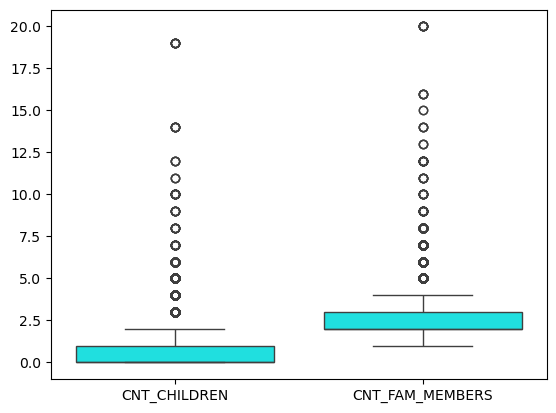

In [122]:
# CNT_CHIDREN and CNT_FAM_MEMBERS are discrete numerical variables
# Plot boxplot on CNT_CHIDREN and CNT_FAM_MEMBERS columns to observe spread of the data
sns.boxplot(data=appl_Merged_df[['CNT_CHILDREN','CNT_FAM_MEMBERS']], color='cyan')
plt.show()

In [123]:
# Upto 99th percentile, there are 3 or less children
# We can limit the CNT_CHILDREN column upto 3
# Look at percentage of outliers beyond a value 3 in CNT_CHILDREN column

# Number of records with CNT_CHILDREN>3
print(len(appl_Merged_df[appl_Merged_df.CNT_CHILDREN>3].CNT_CHILDREN))
# Total number of records
print(len(appl_Merged_df.CNT_CHILDREN))
# percentage of records with CNT_CHILDREN>3
print((len(appl_Merged_df[appl_Merged_df.CNT_CHILDREN>3].CNT_CHILDREN) / len(appl_Merged_df.CNT_CHILDREN))*100)


2512
1413701
0.17768962460944712


In [124]:
# A very small percentage in the CNT_CHILDREN columns lies beyond 3
# This can be filtered out.
appl_Merged_df = appl_Merged_df[appl_Merged_df.CNT_CHILDREN<=3]

In [125]:
appl_Merged_df.shape

(1411189, 35)

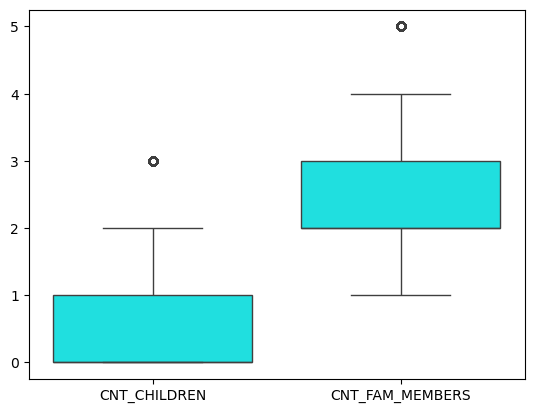

In [126]:
# Plot boxplot on CNT_CHIDREN and CNT_FAM_MEMBERS columns to observe spread of the data now
sns.boxplot(data=appl_Merged_df[['CNT_CHILDREN','CNT_FAM_MEMBERS']], color='cyan')
plt.show()

In [127]:
# Originally, there were 5 or less family members, upto 99th percentile
# Once the outliers in CNT_CHILDREN columns are discarded, there are 5 or less family members at the max in CNT_FAM_MEMBERS
# So, CNT_FAM_MEMBERS column is automatically limited upto 5
# No outlier treatment necessary

###### CNT_PAYMENT

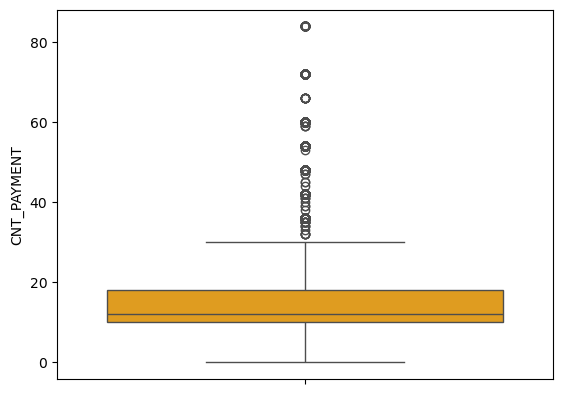

In [128]:
# CNT_PAYMENT is a continuous numerical variable
# Assumption: The term of previous credit is given in months
# Plot boxplot on CNT_PAYMENT column to observe spread of the data
sns.boxplot(data=appl_Merged_df, y='CNT_PAYMENT', color='orange')
plt.show()

In [129]:
# Look at quantile values of CNT_PAYMENT variable
quant_CNT_PAYMENT = appl_Merged_df.CNT_PAYMENT.quantile(q=[0,0.09,0.1,0.25,0.5,0.75,0.88,0.9,0.95,0.99,1])
quant_CNT_PAYMENT

0.00     0.0
0.09     4.0
0.10     4.0
0.25    10.0
0.50    12.0
0.75    18.0
0.88    30.0
0.90    36.0
0.95    48.0
0.99    60.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

In [130]:
# Computer lower and upper bounds based on a typical formula, involving Q1 (25%), Q3 (75%) and IQR (75% - 25%)
print(quant_CNT_PAYMENT.index)

IQR_CNT_PAYMENT = quant_CNT_PAYMENT[0.75] - quant_CNT_PAYMENT[0.25]
print(IQR_CNT_PAYMENT)

lower_CNT_PAYMENT = quant_CNT_PAYMENT[0.25] - (1.5*IQR_CNT_PAYMENT)
upper_CNT_PAYMENT = quant_CNT_PAYMENT[0.75] + (1.5*IQR_CNT_PAYMENT)

print(lower_CNT_PAYMENT, upper_CNT_PAYMENT)

Index([0.0, 0.09, 0.1, 0.25, 0.5, 0.75, 0.88, 0.9, 0.95, 0.99, 1.0], dtype='float64')
8.0
-2.0 30.0


In [131]:
# Lower bound below 0 is not practical value for a loan term
# Upper bound is quite below 99th percentile 
# CNT_PAYMENT values can be limited from 4 months to 60 months

In [132]:
# Look at percentage of outliers below 4 and above 60 in CNT_PAYMENT column
print((len(appl_Merged_df[appl_Merged_df.CNT_PAYMENT<4].CNT_PAYMENT) / len(appl_Merged_df.CNT_PAYMENT))*100)
print((len(appl_Merged_df[appl_Merged_df.CNT_PAYMENT>60].CNT_PAYMENT) / len(appl_Merged_df.CNT_PAYMENT))*100)

8.692953247226274
0.012613477004143316


In [133]:
# >8% of values lie below 4 in CNT_PAYMENT column, but as these are impractical values, need to be dropped
# A very low percentage of the values in CNT_PAYMENT column lie beyond value 60
# Due to being in the outlier range, these values can be filtered out.
appl_Merged_df = appl_Merged_df[(appl_Merged_df.CNT_PAYMENT>=4)&(appl_Merged_df.CNT_PAYMENT<=60)]

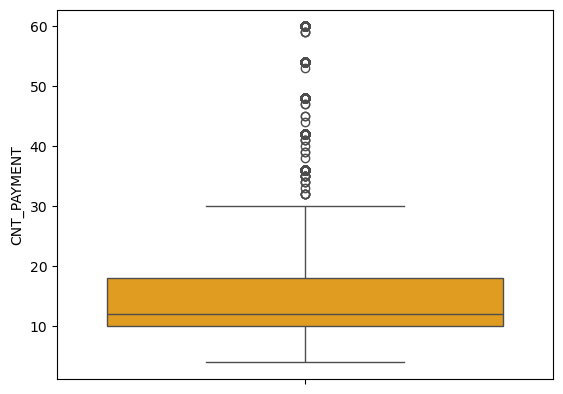

In [134]:
sns.boxplot(data=appl_Merged_df, y='CNT_PAYMENT', color='orange')
plt.show()

In [135]:
appl_Merged_df.shape

(1288337, 35)

###### EMPL_YEARS

In [136]:
appl_Merged_df.describe(percentiles=[0.1, 0.2, 0.25, 0.5, 0.80, 0.90, 0.95, 0.99])

AGE_YEARS  AMT_ANNUITY_Pres  AMT_ANNUITY_Prev  AMT_CREDIT_Pres  \
count  1.288337e+06      1.288337e+06      1.288337e+06     1.288337e+06   
mean   4.488154e+01      2.703818e+04      1.515615e+04     5.880314e+05   
std    1.199671e+01      1.399967e+04      1.333689e+04     3.863394e+05   
min    2.052000e+01      1.615500e+03      0.000000e+00     4.500000e+04   
10%    2.886000e+01      1.125000e+04      4.628475e+03     1.800000e+05   
20%    3.287000e+01      1.502100e+04      6.718230e+03     2.547000e+05   
25%    3.498000e+01      1.675800e+04      7.930620e+03     2.700000e+05   
50%    4.415000e+01      2.493000e+04      1.122376e+04     5.084955e+05   
80%    5.722000e+01      3.725550e+04      2.019360e+04     9.000000e+05   
90%    6.171000e+01      4.543200e+04      3.052908e+04     1.125000e+06   
95%    6.423000e+01      5.259600e+04      4.255286e+04     1.320849e+06   
99%    6.731000e+01      6.900750e+04      6.673446e+04     1.786500e+06   
max    6.904000e+01      2.250000e+05      4.180581e+05     3.956274e+06   

       AMT_CREDIT_Prev  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_DAY  \
count     1.288337e+06      1.288337e+06               1.288337e+06   
mean      1.930319e+05      1.732505e+05               6.866759e-03   
std       3.274315e+05      2.055980e+05               1.010146e-01   
min       0.000000e+00      2.565000e+04               0.000000e+00   
10%       0.000000e+00      9.000000e+04               0.000000e+00   
20%       0.000000e+00      1.125000e+05               0.000000e+00   
25%       2.112300e+04      1.125000e+05               0.000000e+00   
50%       7.360200e+04      1.575000e+05               0.000000e+00   
80%       2.573910e+05      2.250000e+05               0.000000e+00   
90%       5.331600e+05      2.700000e+05               6.817196e-03   
95%       9.000000e+05      3.375000e+05               6.817196e-03   
99%       1.546020e+06      4.500000e+05               6.817196e-03   
max       4.509688e+06      1.170000e+08               9.000000e+00   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  \
count                1.288337e+06               1.288337e+06   
mean                 6.228802e-03               3.008556e-01   
std                  7.729260e-02               9.217346e-01   
min                  0.000000e+00               0.000000e+00   
10%                  0.000000e+00               0.000000e+00   
20%                  0.000000e+00               0.000000e+00   
25%                  0.000000e+00               0.000000e+00   
50%                  0.000000e+00               0.000000e+00   
80%                  0.000000e+00               3.013734e-01   
90%                  6.202833e-03               1.000000e+00   
95%                  6.202833e-03               1.000000e+00   
99%                  6.202833e-03               4.000000e+00   
max                  4.000000e+00               2.700000e+01   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_WEEK  \
count               1.288337e+06                1.288337e+06   
mean                3.632131e-01                3.850727e-02   
std                 7.257013e-01                2.011885e-01   
min                 0.000000e+00                0.000000e+00   
10%                 0.000000e+00                0.000000e+00   
20%                 0.000000e+00                0.000000e+00   
25%                 0.000000e+00                0.000000e+00   
50%                 0.000000e+00                0.000000e+00   
80%                 1.000000e+00                0.000000e+00   
90%                 1.000000e+00                3.856572e-02   
95%                 2.000000e+00                3.856572e-02   
99%                 3.000000e+00                1.000000e+00   
max                 2.610000e+02                8.000000e+00   

       AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  CNT_FAM_MEMBERS  \
count                1.288337e+06  1.288337e+06     1.288337e+06   
mean                

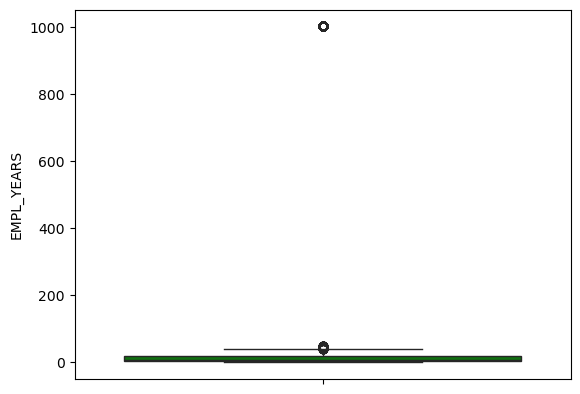

In [137]:
# EMPL_YEARS is a discrete numerical variable
# Plot boxplot on EMPL_YEARS column to observe spread of the data
sns.boxplot(data=appl_Merged_df.EMPL_YEARS, color='green')
plt.show()

In [138]:
# Look at quantile values of CNT_PAYMENT variable
quant_EMPL_YEARS = appl_Merged_df.EMPL_YEARS.quantile(q=[0,0.75,0.8,0.81,0.83,0.9,1])
quant_EMPL_YEARS 

0.00       0.00
0.75      18.21
0.80      40.12
0.81    1000.67
0.83    1000.67
0.90    1000.67
1.00    1000.67
Name: EMPL_YEARS, dtype: float64

In [139]:
# Look at percentage of outliers beyond 50 in EMPL_YEARS column
(len(appl_Merged_df[appl_Merged_df.EMPL_YEARS>50].EMPL_YEARS) / len(appl_Merged_df.EMPL_YEARS))*100

19.927161914933748

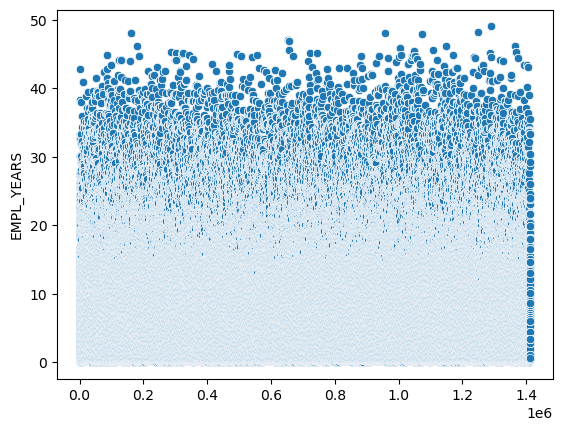

In [140]:
# scatter plot for EMPL_YEARS column
sns.scatterplot(appl_Merged_df[appl_Merged_df.EMPL_YEARS<=100].EMPL_YEARS)
plt.show()

In [141]:
# Most of the values lie within 50 in EMPL_YEARS column
# The values can be limited within 50 for this column
appl_Merged_df = appl_Merged_df[appl_Merged_df.EMPL_YEARS<=50]

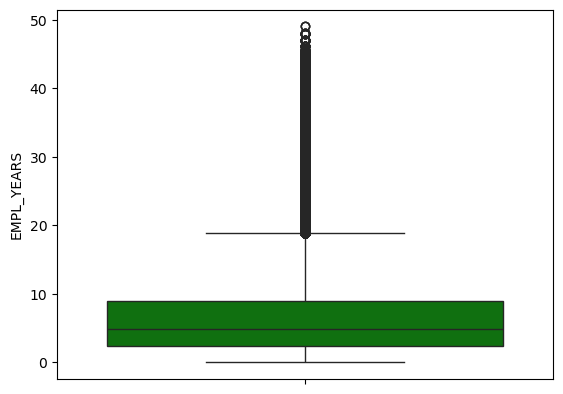

In [142]:
sns.boxplot(data=appl_Merged_df.EMPL_YEARS, color='green')
plt.show()

In [143]:
appl_Merged_df.shape

(1031608, 35)

###### AMT_INCOME_TOTAL

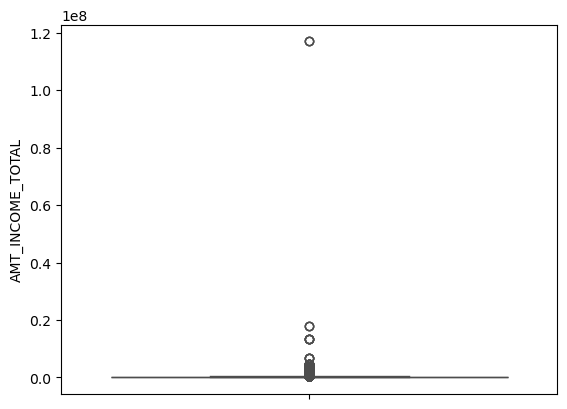

In [144]:
# AMT_INCOME_TOTAL is a discrete numerical variable
# Plot boxplot on AMT_INCOME_TOTAL column to observe spread of the data
sns.boxplot(data=appl_Merged_df, y='AMT_INCOME_TOTAL', color='yellow')
plt.show()

In [145]:
appl_Merged_df.AMT_INCOME_TOTAL.quantile(q=[0.25,0.5,0.75,0.9,0.99,1])

0.25       112500.0
0.50       157500.0
0.75       225000.0
0.90       292500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [146]:
# Look at percentage of outliers beyond 472500 in AMT_INCOME_TOTAL column
(len(appl_Merged_df[appl_Merged_df.AMT_INCOME_TOTAL>472500].AMT_INCOME_TOTAL) / len(appl_Merged_df.AMT_INCOME_TOTAL))*100

0.9864211987499127

In [147]:
# Upto 1% of the values in AMT_INCOME_TOTAL are beyond 99th percentile
# The values in AMT_INCOME_TOTAL can be limited to 99th percentile
appl_Merged_df = appl_Merged_df[appl_Merged_df.AMT_INCOME_TOTAL<=472500]

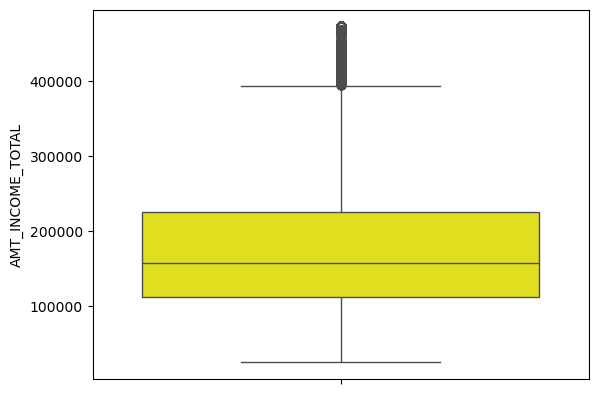

In [148]:
sns.boxplot(data=appl_Merged_df, y='AMT_INCOME_TOTAL', color='yellow')
plt.show()

In [149]:
appl_Merged_df.shape

(1021432, 35)

###### EXT_SOURCE_2/3

In [150]:
# Look at the numerical description of the dataset
percentile_EXT_SOURCE = appl_Merged_df[['EXT_SOURCE_2','EXT_SOURCE_3']].describe(percentiles=[0.005,0.1, 0.2, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])
percentile_EXT_SOURCE

EXT_SOURCE_2  EXT_SOURCE_3
count  1.021432e+06  1.021432e+06
mean   5.124304e-01  4.813658e-01
std    1.897868e-01  1.799370e-01
min    8.173617e-08  5.272652e-04
0.5%   1.149857e-02  3.923772e-02
10%    2.169867e-01  2.200946e-01
20%    3.417277e-01  3.248912e-01
25%    3.941376e-01  3.689687e-01
50%    5.627572e-01  4.896986e-01
75%    6.600443e-01  6.109913e-01
90%    7.183718e-01  7.180328e-01
95%    7.443678e-01  7.636399e-01
99%    7.799575e-01  8.203830e-01
max    8.549997e-01  8.939761e-01

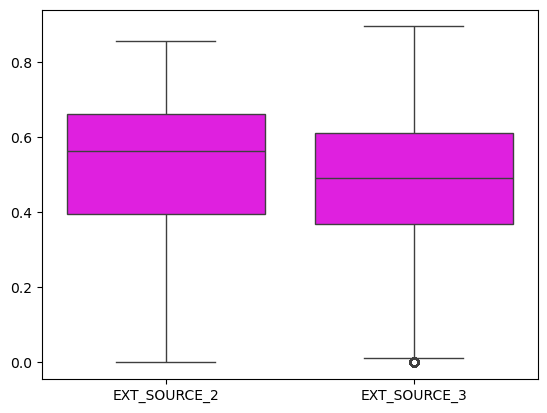

In [151]:
# EXT_SOURCE_2 and EXT_SOURCE_3 are continuous numerical variables
# Plot boxplot on EXT_SOURCE_2 and EXT_SOURCE_3 columns to observe spread of the data
sns.boxplot(data=appl_Merged_df[['EXT_SOURCE_2','EXT_SOURCE_3']], color='magenta')
plt.show()

In [152]:
# The minimum values in EXT_SOURCE_2 and EXT_SOURCE_2 columns are far less to be practical.
# Look at the precentage of values below 0.005
print((len(appl_Merged_df[appl_Merged_df.EXT_SOURCE_2<0.005].EXT_SOURCE_2) / len(appl_Merged_df.EXT_SOURCE_2))*100)
print((len(appl_Merged_df[appl_Merged_df.EXT_SOURCE_3<0.005].EXT_SOURCE_3) / len(appl_Merged_df.EXT_SOURCE_3))*100)

# The external sources score values can be limited to around 0.005 in the lower side
appl_Merged_df = appl_Merged_df[appl_Merged_df.EXT_SOURCE_2>=0.005]
appl_Merged_df = appl_Merged_df[appl_Merged_df.EXT_SOURCE_3>=0.005]

0.25327187712936344
0.3462785579460992


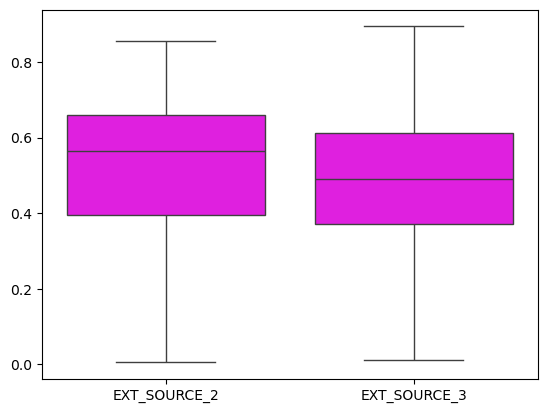

In [153]:
sns.boxplot(data=appl_Merged_df[['EXT_SOURCE_2','EXT_SOURCE_3']], color='magenta')
plt.show()

In [154]:
appl_Merged_df.shape

(1015333, 35)

###### AMT_CREDIT and AMT_ANNUITY

In [155]:
appl_Merged_df[['AMT_CREDIT_Pres','AMT_CREDIT_Prev','AMT_ANNUITY_Pres','AMT_ANNUITY_Prev']].describe(percentiles=[0.25, 0.5,0.75, 0.9, 0.99])

AMT_CREDIT_Pres  AMT_CREDIT_Prev  AMT_ANNUITY_Pres  AMT_ANNUITY_Prev
count     1.015333e+06     1.015333e+06      1.015333e+06      1.015333e+06
mean      5.966808e+05     1.895125e+05      2.764276e+04      1.508404e+04
std       3.841105e+05     3.268513e+05      1.386462e+04      1.334289e+04
min       4.500000e+04     0.000000e+00      1.980000e+03      0.000000e+00
25%       2.814930e+05     2.190600e+04      1.737450e+04      7.715700e+03
50%       5.185620e+05     7.190550e+04      2.585700e+04      1.122376e+04
75%       8.086500e+05     1.829565e+05      3.541950e+04      1.668852e+04
90%       1.125000e+06     5.220000e+05      4.604400e+04      3.067128e+04
99%       1.762110e+06     1.546020e+06      6.881400e+04      6.671599e+04
max       3.375000e+06     4.104351e+06      2.165895e+05      4.180581e+05

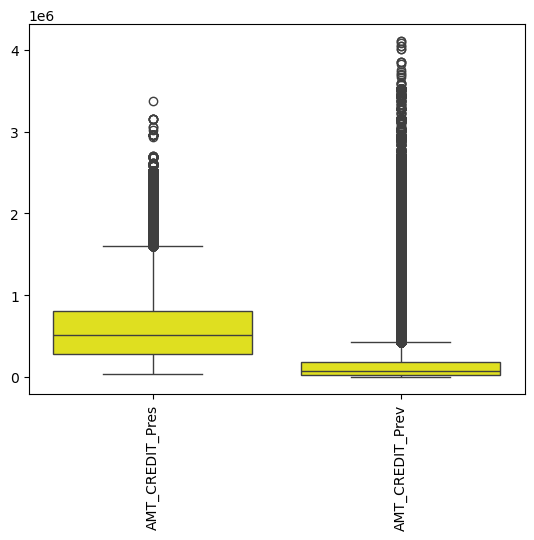

In [156]:
sns.boxplot(appl_Merged_df[['AMT_CREDIT_Pres','AMT_CREDIT_Prev']], color='yellow')
plt.xticks(rotation=90)
plt.show()

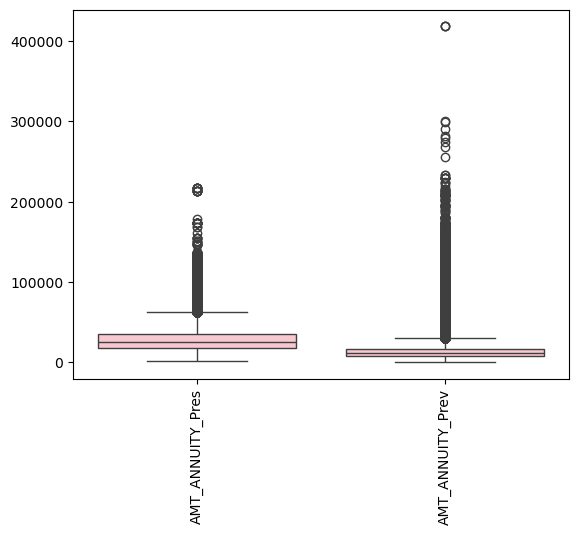

In [157]:
sns.boxplot(appl_Merged_df[['AMT_ANNUITY_Pres','AMT_ANNUITY_Prev']], color='pink')
plt.xticks(rotation=90)
plt.show()

In [158]:
# Look at the precentage of values beyond 18L and 16L in CREDIT present and previous columns
print((len(appl_Merged_df[appl_Merged_df.AMT_CREDIT_Pres>1800000].AMT_CREDIT_Pres) / len(appl_Merged_df.AMT_CREDIT_Pres))*100)
print((len(appl_Merged_df[appl_Merged_df.AMT_CREDIT_Prev>1600000].AMT_CREDIT_Prev) / len(appl_Merged_df.AMT_CREDIT_Prev))*100)

0.6780041621812745
0.8038741969383444


In [159]:
# Look at the precentage of values beyond 70K in ANNUITY present and previous columns
print((len(appl_Merged_df[appl_Merged_df.AMT_ANNUITY_Pres>70000].AMT_ANNUITY_Pres) / len(appl_Merged_df.AMT_ANNUITY_Prev))*100)
print((len(appl_Merged_df[appl_Merged_df.AMT_ANNUITY_Prev>70000].AMT_ANNUITY_Prev) / len(appl_Merged_df.AMT_ANNUITY_Prev))*100)

0.8803023244590692
0.8191401244714788


In [160]:
# The CREDIT values can be limited upto 18L and 16L in present and previous columns respectively
appl_Merged_df = appl_Merged_df[appl_Merged_df.AMT_CREDIT_Pres<=1800000]
appl_Merged_df = appl_Merged_df[appl_Merged_df.AMT_CREDIT_Prev<=1800000]

# The ANNUITY values can be limited upto 70K in both present and previous columns
appl_Merged_df = appl_Merged_df[appl_Merged_df.AMT_ANNUITY_Pres<=70000]
appl_Merged_df = appl_Merged_df[appl_Merged_df.AMT_ANNUITY_Prev<=70000]


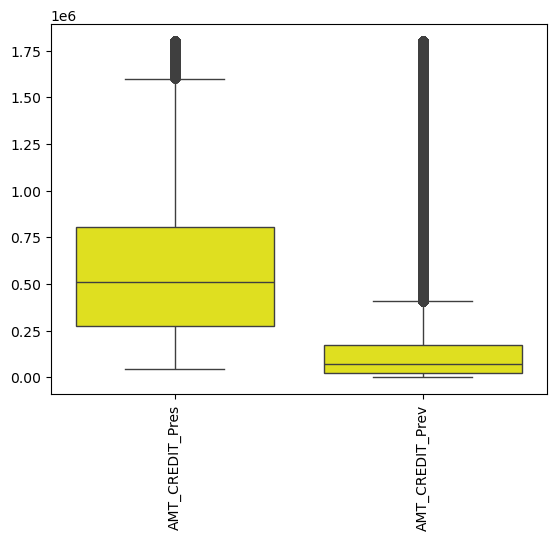

In [161]:
sns.boxplot(appl_Merged_df[['AMT_CREDIT_Pres','AMT_CREDIT_Prev']], color='yellow')
plt.xticks(rotation=90)
plt.show()

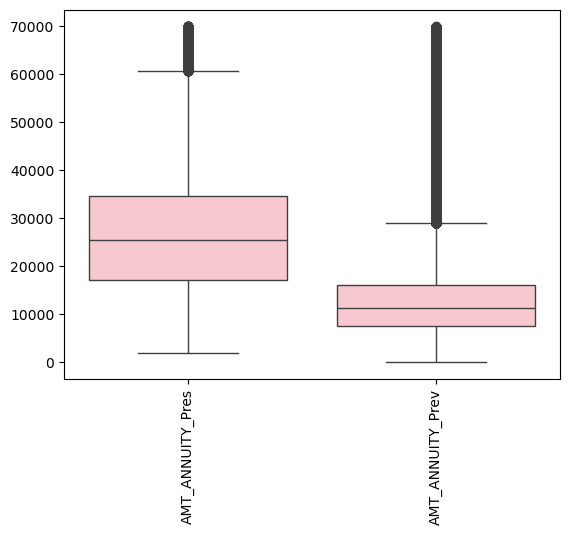

In [162]:
sns.boxplot(appl_Merged_df[['AMT_ANNUITY_Pres','AMT_ANNUITY_Prev']], color='pink')
plt.xticks(rotation=90)
plt.show()

In [163]:
appl_Merged_df.shape

(989771, 35)

###### AMT_REQ_CREDIT_BUREAU

In [164]:
appl_Merged_df[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']].describe(percentiles=[0.9,0.99])

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               989771.000000              989771.000000   
mean                     2.809137                   0.353919   
std                      2.027057                   0.727396   
min                      0.000000                   0.000000   
50%                      2.912612                   0.000000   
90%                      6.000000                   1.000000   
99%                      9.000000                   3.000000   
max                     23.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              989771.000000               989771.000000   
mean                    0.313162                    0.038372   
std                     0.940966                    0.198660   
min                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
90%                     1.000000                    0.038566   
99%                     4.000000                    1.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              989771.000000               989771.000000  
mean                    0.006948                    0.006353  
std                     0.104035                    0.078295  
min                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
90%                     0.006817                    0.006203  
99%                     0.006817                    0.006203  
max                     9.000000                    4.000000

In [165]:
# AMT_REQ_CREDIT_BUREAU_YEAR: min 0 75%-4       99%-8      max 22    <--
print((len(appl_Merged_df[appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR>9].AMT_REQ_CREDIT_BUREAU_YEAR) / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR))*100)
# AMT_REQ_CREDIT_BUREAU_QRT:  min 0 75%-0.3     99%-2      max 261   <-----
print((len(appl_Merged_df[appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT>3].AMT_REQ_CREDIT_BUREAU_QRT) / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT))*100)
# AMT_REQ_CREDIT_BUREAU_MON:  min 0 75%-0.3     99%-4      max 27    <--
print((len(appl_Merged_df[appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON>4].AMT_REQ_CREDIT_BUREAU_MON) / len(appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON))*100)


0.13861792273162177
0.4100948603262775
0.861411376975078


In [166]:
# Higher limit can be set to 99th percentile for AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON columns
appl_Merged_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR.quantile(q=[0.99]).loc[0.99]
appl_Merged_df['AMT_REQ_CREDIT_BUREAU_QRT']  = appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT.quantile(q=[0.99]).loc[0.99]
appl_Merged_df['AMT_REQ_CREDIT_BUREAU_MON']  = appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON.quantile(q=[0.99]).loc[0.99]


In [167]:
# AMT_REQ_CREDIT_BUREAU_WEEK/DAY/_HOUR columns have extremely low values all across the range
# these columns can be discarded
appl_Merged_df.drop(columns=['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'], inplace=True)

In [168]:
appl_Merged_df.shape

(989771, 32)

###### CNT_CHILDREN vs CNT_FAM_MEMBERS

In [169]:
appl_Merged_df[['CNT_CHILDREN','CNT_FAM_MEMBERS']].describe()

CNT_CHILDREN  CNT_FAM_MEMBERS
count  989771.000000    989771.000000
mean        0.485887         2.251827
std         0.739772         0.914258
min         0.000000         1.000000
25%         0.000000         2.000000
50%         0.000000         2.000000
75%         1.000000         3.000000
max         3.000000         5.000000

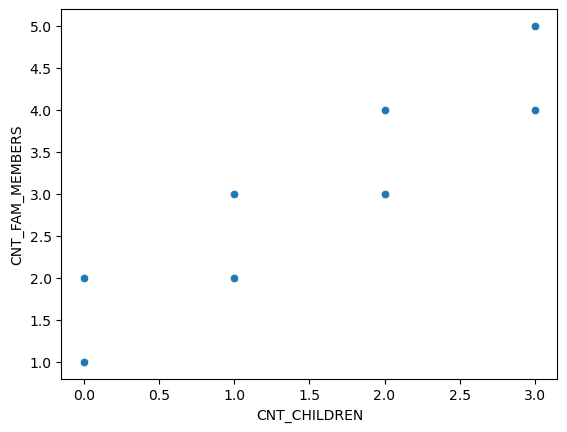

In [170]:
# Plot CNT_CHILDREN and CNT_FAM_MEMBERS to see if there are any multivariate outliers
sns.scatterplot(data=appl_Merged_df, x='CNT_CHILDREN', y='CNT_FAM_MEMBERS')
plt.show()

In [171]:
# There is a linear correlation between CNT_CHILDREN and CNT_FAM_MEMBERS.
# There are no outlier observed between CNT_CHILDREN and CNT_FAM_MEMBERS.

###### AMT_CREDIT vs AMT_ANNUITY

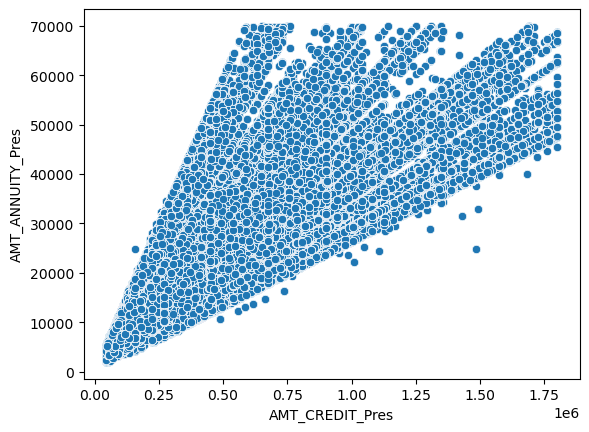

In [172]:
# AMT_CREDIT_Pres and AMT_ANNUITY_Pres
sns.scatterplot(data=appl_Merged_df, x='AMT_CREDIT_Pres', y='AMT_ANNUITY_Pres')
plt.show()

In [173]:
appl_Merged_df[['AMT_CREDIT_Pres','AMT_ANNUITY_Pres']].corr()

AMT_CREDIT_Pres  AMT_ANNUITY_Pres
AMT_CREDIT_Pres          1.000000          0.757064
AMT_ANNUITY_Pres         0.757064          1.000000

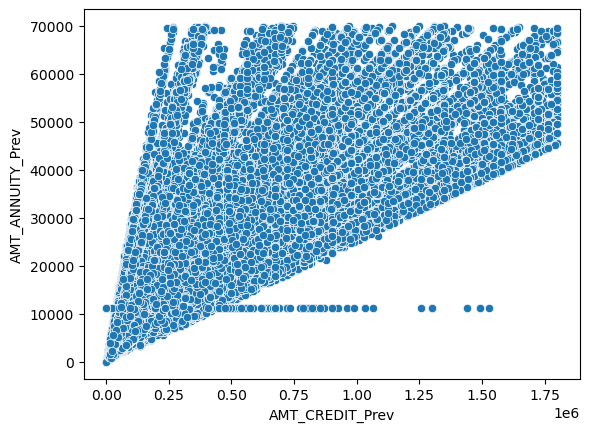

In [174]:
# AMT_CREDIT_Pres and AMT_ANNUITY_Pres
sns.scatterplot(data=appl_Merged_df, x='AMT_CREDIT_Prev', y='AMT_ANNUITY_Prev')
plt.show()

In [175]:
appl_Merged_df[['AMT_CREDIT_Prev','AMT_ANNUITY_Prev']].corr()

AMT_CREDIT_Prev  AMT_ANNUITY_Prev
AMT_CREDIT_Prev          1.000000          0.818952
AMT_ANNUITY_Prev         0.818952          1.000000

In [176]:
# AMT_CREDIT and AMT_ANNUITY are quite closely correlated to each other
# Higher the credit amount for a loan, higher would be the annuity i.e regular payback amount
# For present application, the correlation is 0.75, but for prev, it is 0.81
# For previous application credit and annuity, there are some outliers observed

###### AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON vs TARGET

In [177]:
# The 3 credit bureau enquiries related columns can be merged into one with avg number of enquiries
appl_Merged_df['AVG_ENQ_CREDIT_BUREAU_MONTH'] = round ( ( ( (appl_Merged_df.AMT_REQ_CREDIT_BUREAU_YEAR/12) +
                                                            (appl_Merged_df.AMT_REQ_CREDIT_BUREAU_QRT/3)   +
                                                             appl_Merged_df.AMT_REQ_CREDIT_BUREAU_MON        ) / 3 ) , 3)

In [178]:
appl_Merged_df.head()

AGE_YEARS  AMT_ANNUITY_Pres  AMT_ANNUITY_Prev  AMT_CREDIT_Pres  \
0      25.92           24700.5          9251.775         406597.5   
2      45.93           35698.5         64567.665        1293502.5   
3      45.93           35698.5          6737.310        1293502.5   
4      52.18            6750.0          5357.250         135000.0   
5      52.07           29686.5         24246.000         312682.5   

   AMT_CREDIT_Prev  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_MON  \
0         179055.0          202500.0                        4.0   
2         348637.5          270000.0                        4.0   
3          68053.5          270000.0                        4.0   
4          20106.0           67500.0                        4.0   
5         675000.0          135000.0                        4.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR CASH_LOAN_CATEGORY  \
0                        3.0                         9.0  CASH_LOAN_UNKNOWN   
2                        3.0                         9.0  CASH_LOAN_UNKNOWN   
3                        3.0                         9.0  CASH_LOAN_UNKNOWN   
4                        3.0                         9.0  CASH_LOAN_UNKNOWN   
5                        3.0                         9.0  CASH_LOAN_UNKNOWN   

   CNT_CHILDREN  CNT_FAM_MEMBERS  CNT_PAYMENT CODE_GENDER CODE_REJECT_REASON  \
0             0              1.0         24.0           M            Unknown   
2             0              2.0          6.0           F            Unknown   
3             0              2.0         12.0           F            Unknown   
4             0              1.0          4.0           M            Unknown   
5             0              2.0         48.0           F            Unknown   

   EMPL_YEARS  EXT_SOURCE_2  EXT_SOURCE_3 FLAG_OWN_CAR FLAG_OWN_REALTY  \
0        1.75      0.262949      0.139376            N               Y   
2        3.25      0.622246      0.489699            N               N   
3        3.25      0.622246      0.489699            N               N   
4        0.62      0.555912      0.729567            Y               Y   
5        8.33      0.650442      0.489699            N               Y   

  NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE_Pres NAME_CONTRACT_TYPE_Prev  \
0             Approved              Cash loans          Consumer loans   
2             Approved              Cash loans          Consumer loans   
3             Approved              Cash loans          Consumer loans   
4             Approved         Revolving loans          Consumer loans   
5             Approved              Cash loans              Cash loans   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married     Own apartment   
2               Higher education               Married     Own apartment   
3               Higher education               Married     Own apartment   
4  Secondary / secondary special  Single / not married     Own apartment   
5  Secondary / secondary special               Married     Own apartment   

  NAME_INCOME_TYPE NAME_YIELD_GROUP         OCCUPATION_TYPE  \
0          Working              low   LOW_INCOME_OCCUPATION   
2          Working           middle  HIGH_INCOME_OCCUPATION   
3          Working           middle  HIGH_INCOME_OCCUPATION   
4          Working           middle   LOW_INCOME_OCCUPATION   
5          Working              low   LOW_INCOME_OCCUPATION   

   ORGANIZATION_TYPE  REGION_RATING_AVG  TARGET  AVG_ENQ_CREDIT_BUREAU_MONTH  
0    BUSINESS_SECTOR                2.0       1                        1.917  
2   EDUCATION_SECTOR                1.0       0                        1.917  
3   EDUCATION_SECTOR                1.0       0                        1.917  
4  GOVERNMENT_AGENCY                2.0       0                        1.917  
5    BUSINESS_SECTOR                2.0       0                        1.917

In [179]:
# REGION_RATING_AVG, TARGET, AVG_ENQ_CREDIT_BUREAU_MONTH

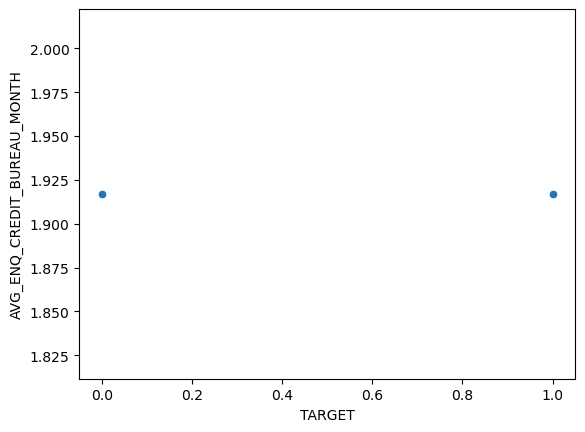

In [180]:
sns.scatterplot(data=appl_Merged_df, x='TARGET', y='AVG_ENQ_CREDIT_BUREAU_MONTH')
plt.show()

In [181]:
# At this point, the average number of enquiries are same in all records, so the enquiries column(s) are not useful

###### AGE_YEARS vs EMPL_YEARS

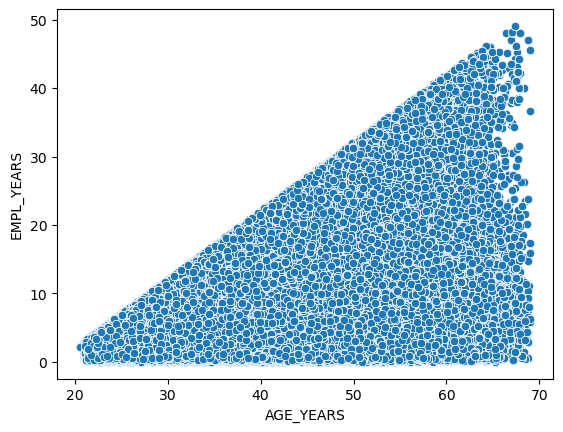

In [182]:
sns.scatterplot(data=appl_Merged_df, x='AGE_YEARS', y='EMPL_YEARS')
plt.show()

In [183]:
# Higher the age, more is supposed to be the work experience i.e. indicated here in terms of employment years
# But it is not a completely linear correlation here
# There are numerious cases with higher age and no or less employment years

In [184]:
appl_Merged_df[['AGE_YEARS','EMPL_YEARS']].corr()

AGE_YEARS  EMPL_YEARS
AGE_YEARS    1.000000    0.334622
EMPL_YEARS   0.334622    1.000000

In [185]:
# In terms of correlation, there is not much association between the 2 variables AGE_YEARS and EMPL_YEARS

### Data Analysis

In [186]:
# The data can be filtered/extracted into separate data frames for different set of analyses.

#### Reusable Function Definitions

In [187]:
# function for univariate analysis plot, used for each univariate plot
def univariate_Plot (DataFrame, ColumnName, PlotTitle):
    fig, ax = plt.subplots()
    plt.title(label=PlotTitle)
    plt.xticks(rotation=45)
    plt.xlabel(xlabel=ColumnName)
    plt.ylabel(ylabel='Count')
    ax = sns.countplot(data=DataFrame, x=ColumnName, order=DataFrame[ColumnName].value_counts().index)
    plt.show()

In [188]:
# function for univariate analysis plot, used for each univariate plot
def univariate_Hue_Plot (DataFrame, ColumnName, HueColumn, PlotTitle):
    fig, ax = plt.subplots()
    plt.title(label=PlotTitle)
    plt.xticks(rotation=45)
    plt.xlabel(xlabel=ColumnName)
    plt.ylabel(ylabel='Count')
    ax = sns.countplot(data=DataFrame, x=ColumnName, hue=HueColumn, order=DataFrame[ColumnName].value_counts().index)
    plt.show()

#### Univariate Analysis

##### Columns Readjutments

In [189]:
appl_Merged_df.shape

(989771, 33)

In [190]:
# Merge external sources scores into one column
appl_Merged_df['EXT_SOURCES_SCORE'] = round( ( (appl_Merged_df.EXT_SOURCE_2 + appl_Merged_df.EXT_SOURCE_3) / 2 ), 2)

In [191]:
appl_Merged_df.head()

AGE_YEARS  AMT_ANNUITY_Pres  AMT_ANNUITY_Prev  AMT_CREDIT_Pres  \
0      25.92           24700.5          9251.775         406597.5   
2      45.93           35698.5         64567.665        1293502.5   
3      45.93           35698.5          6737.310        1293502.5   
4      52.18            6750.0          5357.250         135000.0   
5      52.07           29686.5         24246.000         312682.5   

   AMT_CREDIT_Prev  AMT_INCOME_TOTAL  AMT_REQ_CREDIT_BUREAU_MON  \
0         179055.0          202500.0                        4.0   
2         348637.5          270000.0                        4.0   
3          68053.5          270000.0                        4.0   
4          20106.0           67500.0                        4.0   
5         675000.0          135000.0                        4.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR CASH_LOAN_CATEGORY  \
0                        3.0                         9.0  CASH_LOAN_UNKNOWN   
2                        3.0                         9.0  CASH_LOAN_UNKNOWN   
3                        3.0                         9.0  CASH_LOAN_UNKNOWN   
4                        3.0                         9.0  CASH_LOAN_UNKNOWN   
5                        3.0                         9.0  CASH_LOAN_UNKNOWN   

   CNT_CHILDREN  CNT_FAM_MEMBERS  CNT_PAYMENT CODE_GENDER CODE_REJECT_REASON  \
0             0              1.0         24.0           M            Unknown   
2             0              2.0          6.0           F            Unknown   
3             0              2.0         12.0           F            Unknown   
4             0              1.0          4.0           M            Unknown   
5             0              2.0         48.0           F            Unknown   

   EMPL_YEARS  EXT_SOURCE_2  EXT_SOURCE_3 FLAG_OWN_CAR FLAG_OWN_REALTY  \
0        1.75      0.262949      0.139376            N               Y   
2        3.25      0.622246      0.489699            N               N   
3        3.25      0.622246      0.489699            N               N   
4        0.62      0.555912      0.729567            Y               Y   
5        8.33      0.650442      0.489699            N               Y   

  NAME_CONTRACT_STATUS NAME_CONTRACT_TYPE_Pres NAME_CONTRACT_TYPE_Prev  \
0             Approved              Cash loans          Consumer loans   
2             Approved              Cash loans          Consumer loans   
3             Approved              Cash loans          Consumer loans   
4             Approved         Revolving loans          Consumer loans   
5             Approved              Cash loans              Cash loans   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married     Own apartment   
2               Higher education               Married     Own apartment   
3               Higher education               Married     Own apartment   
4  Secondary / secondary special  Single / not married     Own apartment   
5  Secondary / secondary special               Married     Own apartment   

  NAME_INCOME_TYPE NAME_YIELD_GROUP         OCCUPATION_TYPE  \
0          Working              low   LOW_INCOME_OCCUPATION   
2          Working           middle  HIGH_INCOME_OCCUPATION   
3          Working           middle  HIGH_INCOME_OCCUPATION   
4          Working           middle   LOW_INCOME_OCCUPATION   
5          Working              low   LOW_INCOME_OCCUPATION   

   ORGANIZATION_TYPE  REGION_RATING_AVG  TARGET  AVG_ENQ_CREDIT_BUREAU_MONTH  \
0    BUSINESS_SECTOR                2.0       1                        1.917   
2   EDUCATION_SECTOR                1.0       0                        1.917   
3   EDUCATION_SECTOR                1.0       0                        1.917   
4  GOVERNMENT_AGENCY                2.0       0                        1.917   
5    BUSINESS_SECTOR                2.0       0                        1.917   

   EXT_SOURCES_SCORE  

In [192]:
appl_Merged_df.EXT_SOURCES_SCORE.unique()

array([0.2 , 0.56, 0.64, 0.57, 0.41, 0.49, 0.61, 0.63, 0.62, 0.51, 0.45,
       0.67, 0.15, 0.59, 0.53, 0.39, 0.68, 0.6 , 0.5 , 0.37, 0.33, 0.72,
       0.31, 0.26, 0.54, 0.75, 0.7 , 0.34, 0.48, 0.23, 0.58, 0.47, 0.65,
       0.36, 0.38, 0.4 , 0.66, 0.42, 0.25, 0.69, 0.21, 0.29, 0.52, 0.35,
       0.19, 0.55, 0.74, 0.44, 0.13, 0.71, 0.46, 0.24, 0.3 , 0.28, 0.14,
       0.43, 0.27, 0.73, 0.78, 0.77, 0.1 , 0.76, 0.18, 0.32, 0.11, 0.16,
       0.08, 0.22, 0.17, 0.79, 0.09, 0.12, 0.05, 0.8 , 0.06, 0.04, 0.81,
       0.07, 0.82, 0.03, 0.83, 0.02, 0.84])

In [193]:
appl_Merged_df = appl_Merged_df[sorted(appl_Merged_df.columns)]
appl_Merged_df.columns

Index(['AGE_YEARS', 'AMT_ANNUITY_Pres', 'AMT_ANNUITY_Prev', 'AMT_CREDIT_Pres',
       'AMT_CREDIT_Prev', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AVG_ENQ_CREDIT_BUREAU_MONTH', 'CASH_LOAN_CATEGORY', 'CNT_CHILDREN',
       'CNT_FAM_MEMBERS', 'CNT_PAYMENT', 'CODE_GENDER', 'CODE_REJECT_REASON',
       'EMPL_YEARS', 'EXT_SOURCES_SCORE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_STATUS',
       'NAME_CONTRACT_TYPE_Pres', 'NAME_CONTRACT_TYPE_Prev',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'REGION_RATING_AVG', 'TARGET'],
      dtype='object')

In [194]:
# Drop the columns not needed anymore
appl_Merged_df.drop(columns=['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
                             'AVG_ENQ_CREDIT_BUREAU_MONTH','EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace=True)

In [195]:
appl_Merged_df.shape

(989771, 28)

In [196]:
# Look at the feature data types
appl_Merged_df.dtypes

AGE_YEARS                  float64
AMT_ANNUITY_Pres           float64
AMT_ANNUITY_Prev           float64
AMT_CREDIT_Pres            float64
AMT_CREDIT_Prev            float64
AMT_INCOME_TOTAL           float64
CASH_LOAN_CATEGORY          object
CNT_CHILDREN                 int64
CNT_FAM_MEMBERS            float64
CNT_PAYMENT                float64
CODE_GENDER                 object
CODE_REJECT_REASON          object
EMPL_YEARS                 float64
EXT_SOURCES_SCORE          float64
FLAG_OWN_CAR                object
FLAG_OWN_REALTY             object
NAME_CONTRACT_STATUS        object
NAME_CONTRACT_TYPE_Pres     object
NAME_CONTRACT_TYPE_Prev     object
NAME_EDUCATION_TYPE         object
NAME_FAMILY_STATUS          object
NAME_HOUSING_TYPE           object
NAME_INCOME_TYPE            object
NAME_YIELD_GROUP            object
OCCUPATION_TYPE             object
ORGANIZATION_TYPE           object
REGION_RATING_AVG          float64
TARGET                       int64
dtype: object

##### TARGET division into potential repayors and defaulters

In [197]:
appl_Merged_df.TARGET.value_counts()

TARGET
0    898940
1     90831
Name: count, dtype: int64

In [198]:
appl_Merged_df.TARGET.value_counts(normalize=True)

TARGET
0    0.90823
1    0.09177
Name: proportion, dtype: float64

In [199]:
# Number of clients having difficulties in repaying their loan is 90831 i.e approx 9%
# Number of applicants who are potentially going to repay their loan is 898940 i.e. approx 91%

In [200]:
# Extract the dataset into 2 separate datasets with TARGET value 1 and 0
# The dataset with TARGET value 1 would indicate potential defaulters, as the clients have difficulties paying.
# The dataset with TARGET value 0 would indicate other cases i.e. potential Repaying clients

Potential_Repayers = appl_Merged_df[appl_Merged_df.TARGET==0]
print(Potential_Repayers.shape)

Potential_Defaulters = appl_Merged_df[appl_Merged_df.TARGET==1]
print(Potential_Defaulters.shape)

(898940, 28)
(90831, 28)


##### CONTRACT_TYPE division into Approved and Refused

In [201]:
appl_Merged_df.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        618251
Canceled        194967
Refused         156265
Unused offer     20288
Name: count, dtype: int64

In [202]:
appl_Merged_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)

NAME_CONTRACT_STATUS
Approved        0.624640
Canceled        0.196982
Refused         0.157880
Unused offer    0.020498
Name: proportion, dtype: float64

In [203]:
# Number of clients whose previous loan was approved is approx 62%
# Number of clients whose previous loan was refused is approx 16%

# Number of clients who cancelled the previous loan request is approx 20%
# Number of clients who didn't use the previous loan offer is approx 2%

In [204]:
# Extract the dataset into 2 separate datasets with NAME_CONTRACT_STATUS value 'Approved' and 'Refused'
# The dataset with contract status 'Approved' indicates that the loan in previous application was approved.
# The dataset with contract status 'Refused' indicates that the loan in previous application was refused.

Previous_Approved = appl_Merged_df[appl_Merged_df.NAME_CONTRACT_STATUS=='Approved']
print(Previous_Approved.shape)

Previous_Refused = appl_Merged_df[appl_Merged_df.NAME_CONTRACT_STATUS=='Refused']
print(Previous_Refused.shape)

(618251, 28)
(156265, 28)


##### Numerical variable univariate analysis

In [205]:
# Create a column to have TARGET values in other way, so to be able to analyze/observe/visualize better
appl_Merged_df['LOAN_TARGET'] = appl_Merged_df.TARGET.apply(lambda x: 1 if x==0 else 0)

In [206]:
appl_Merged_df.shape

(989771, 29)

In [207]:
# Look at numerical columns
numerical_columns = dispNumCols(appl_Merged_df)
numerical_columns


There are 14 numerical columns in the dataset


['AGE_YEARS',
 'AMT_ANNUITY_Pres',
 'AMT_ANNUITY_Prev',
 'AMT_CREDIT_Pres',
 'AMT_CREDIT_Prev',
 'AMT_INCOME_TOTAL',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CNT_PAYMENT',
 'EMPL_YEARS',
 'EXT_SOURCES_SCORE',
 'REGION_RATING_AVG',
 'TARGET',
 'LOAN_TARGET']

###### Heatmap of numerical features

In [208]:
# The correlation among numerical columns can also be observed with the help of a heatmap

In [209]:
# first compute the correlation between relevant numerical columns
numCorr = appl_Merged_df[numerical_columns].corr()
numCorr = round(numCorr,2)

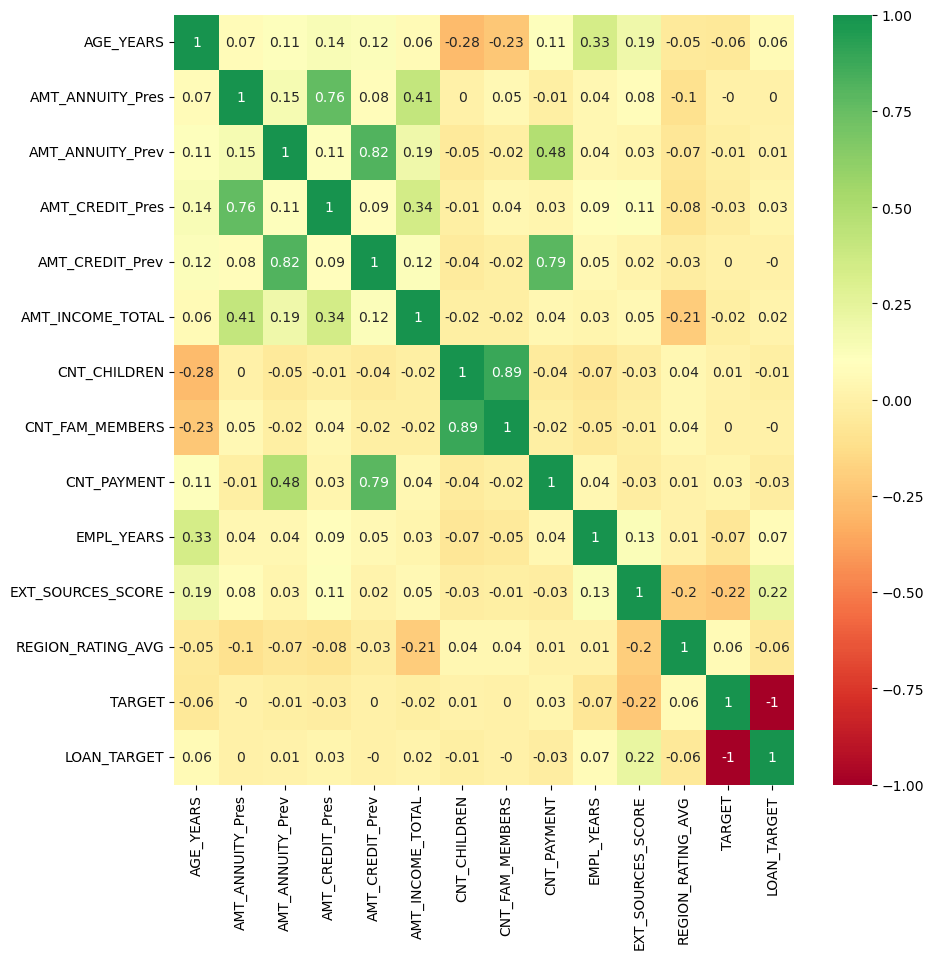

In [210]:
# Draw a heatmap of numerical columns
plt.figure(figsize=(10,10))
sns.heatmap(data=numCorr, cmap='RdYlGn', annot=True, center=0.1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [211]:
# Correlations Insights:
# TARGET variable doesn't have any noticeable correlation with Family, Income, Employment, Rating information
# Regional Ratings and External scores don't seem to be associated with any other numerical feature
# There is a weak but positive correlation between AGE_YEARS and EMPL_YEARS
# CNT_CHILDREN and CNT_FAM_MEMBERS have a string positive correlation
# Respective ANNUITY and CREDIT variables are also associated with each other positively
# Previous loan term CNT_PAYMENT has a stronger correlation with respective CREDIT but weaker with ANNUITY
# Income i.e. AMT_TOTAL_INCOME has a fairly positive association with present CREDIT and ANNNUITY variables

##### Categorical Columns univariate analysis

In [212]:
# Look at categorical columns
categorical_columns = dispCatCols(appl_Merged_df)
categorical_columns


There are 15 categorical columns in the dataset


['CASH_LOAN_CATEGORY',
 'CODE_GENDER',
 'CODE_REJECT_REASON',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE_Pres',
 'NAME_CONTRACT_TYPE_Prev',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_YIELD_GROUP',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [213]:
dispCatUniqueVal(appl_Merged_df)

number of unique values in CASH_LOAN_CATEGORY column are: 4

values counts in CASH_LOAN_CATEGORY column are:
CASH_LOAN_CATEGORY
CASH_LOAN_UNKNOWN    953035
CASH_LOAN_REGULAR     26947
CASH_LOAN_MAJOR        8232
CASH_LOAN_LEISURE      1557
Name: count, dtype: int64


number of unique values in CODE_GENDER column are: 2

values counts in CODE_GENDER column are:
CODE_GENDER
F    630043
M    359728
Name: count, dtype: int64


number of unique values in CODE_REJECT_REASON column are: 8

values counts in CODE_REJECT_REASON column are:
CODE_REJECT_REASON
Unknown    815716
HC          86860
LIMIT       35094
SCO         24997
CLIENT      20288
SCOFR        4902
VERIF        1855
SYSTEM         59
Name: count, dtype: int64


number of unique values in FLAG_OWN_CAR column are: 2

values counts in FLAG_OWN_CAR column are:
FLAG_OWN_CAR
N    621115
Y    368656
Name: count, dtype: int64


number of unique values in FLAG_OWN_REALTY column are: 2

values counts in FLAG_OWN_REALTY column are:
FLAG_OWN

###### Categorical Ordered Columns (Ordinal) univariate analysis

In [214]:
# Following columns are categorical ordered type, i.e. ordinal
# Bar and Pie Chart
PresOrdinalVars = ['NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
PrevOrdinalVars = ['NAME_YIELD_GROUP']

In [215]:
def PotRep_UniPiePlot (VariableName, TitleString):
    Data   = Potential_Repayers[VariableName].value_counts(normalize=True).sort_values(ascending=False)
    Labels = Potential_Repayers[VariableName].value_counts(normalize=True).sort_values(ascending=False).index
    plt.figure(figsize=(10,10))
    plt.pie(x=Data, labels=Labels)
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.show()

In [216]:
def PotDef_UniPiePlot (VariableName, TitleString):
    Data   = Potential_Defaulters[VariableName].value_counts(normalize=True).sort_values(ascending=False)
    Labels = Potential_Defaulters[VariableName].value_counts(normalize=True).sort_values(ascending=False).index
    plt.figure(figsize=(10,10))
    plt.pie(x=Data, labels=Labels)
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.show()

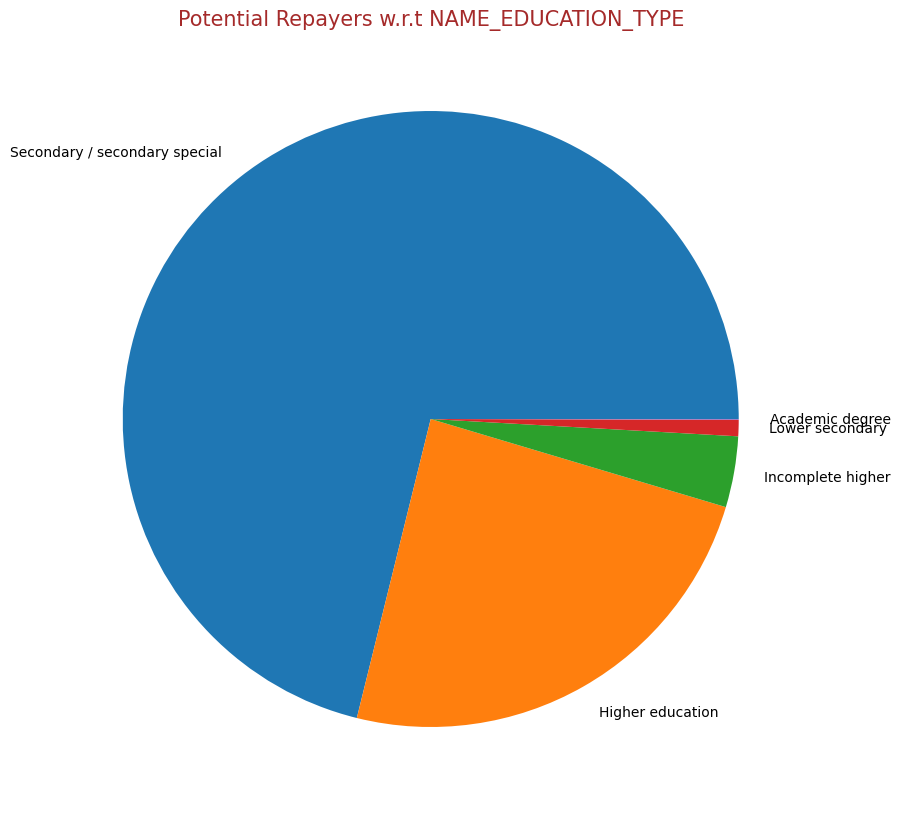

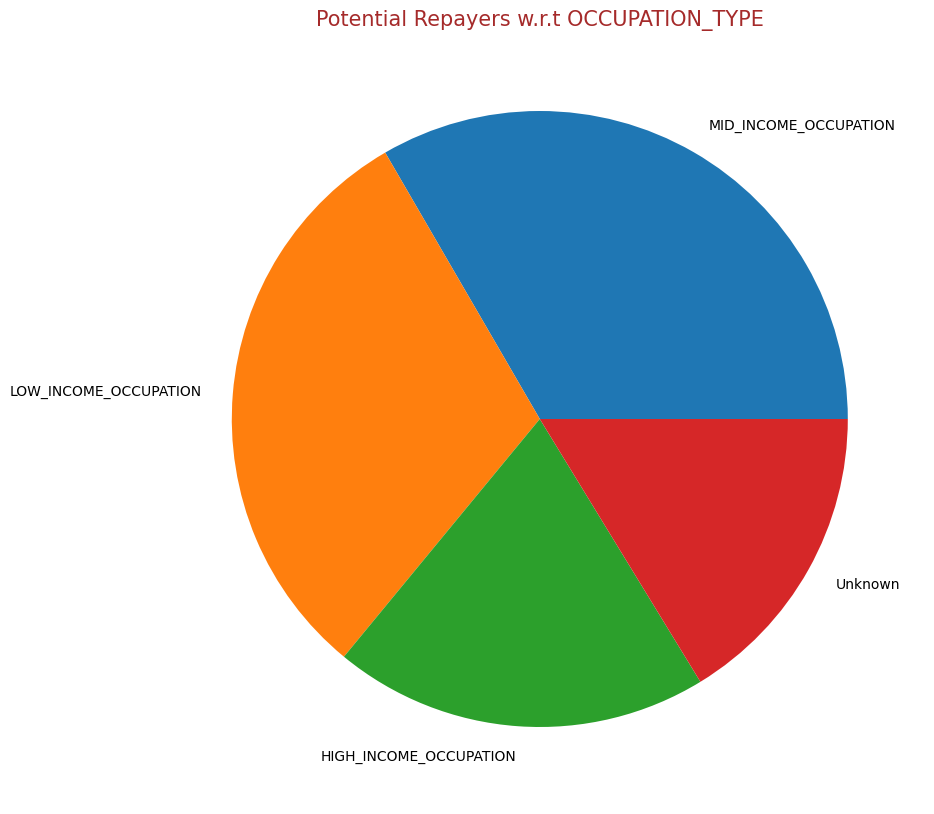

In [217]:
# Plot for all potential repayer clients w.r.t categorical ordinal variables
for var in PresOrdinalVars:
    PotRep_UniPiePlot(var, 'Potential Repayers w.r.t '+var)

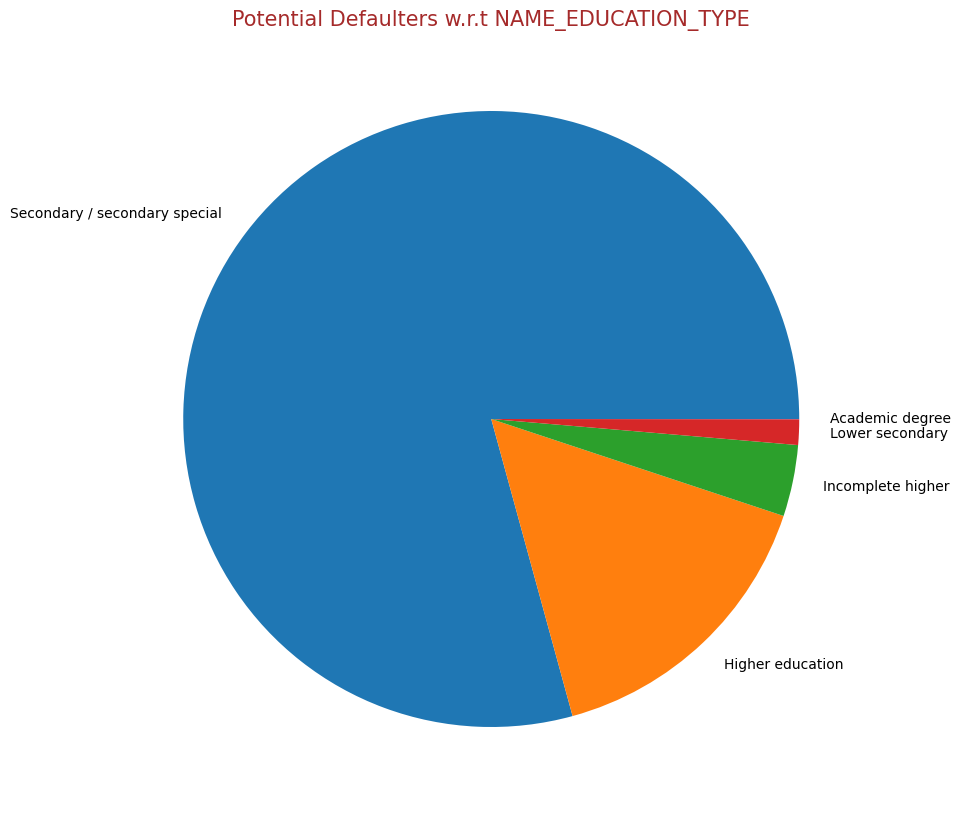

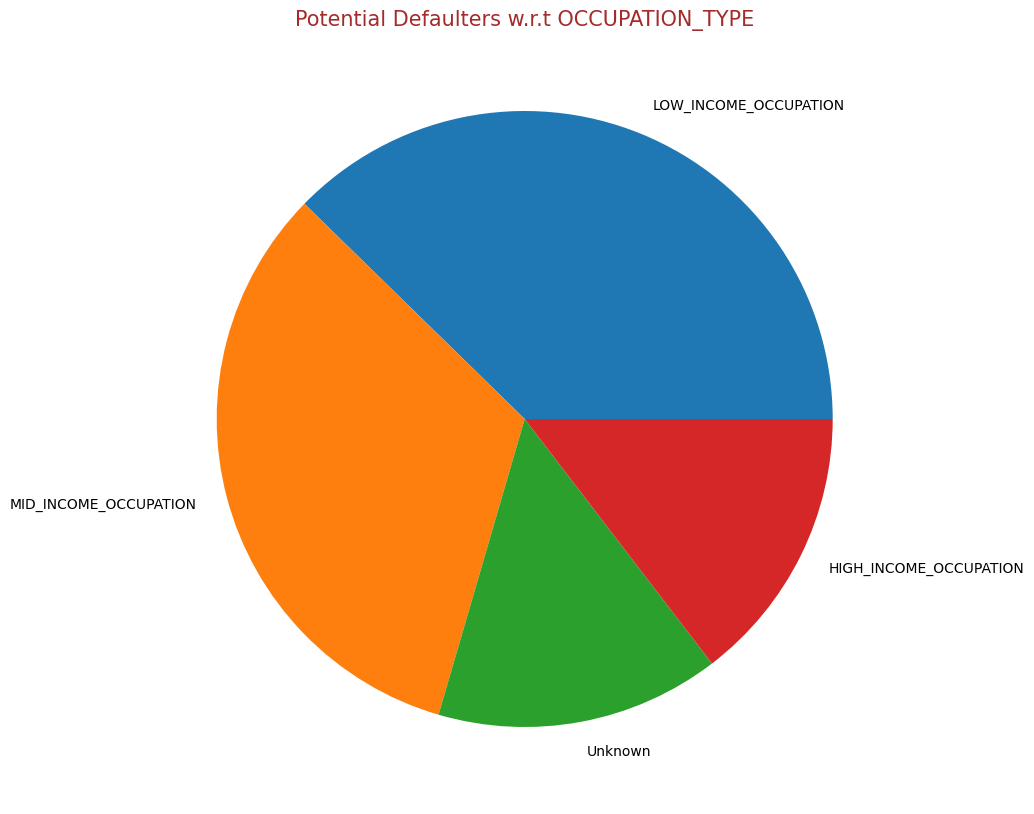

In [218]:
# Plot for all potential defaulter clients w.r.t categorical ordinal variables
for var in PresOrdinalVars:
    PotDef_UniPiePlot(var, 'Potential Defaulters w.r.t '+var)

In [219]:
def PrevApp_UniPiePlot (VariableName, TitleString):
    Data   = Previous_Approved[VariableName].value_counts(normalize=True).sort_values(ascending=False)
    Labels = Previous_Approved[VariableName].value_counts(normalize=True).sort_values(ascending=False).index
    plt.figure(figsize=(8,8))
    plt.pie(x=Data, labels=Labels)
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.show()

In [220]:
def PrevRef_UniPiePlot (VariableName, TitleString):
    Data   = Previous_Refused[VariableName].value_counts(normalize=True).sort_values(ascending=False)
    Labels = Previous_Refused[VariableName].value_counts(normalize=True).sort_values(ascending=False).index
    plt.figure(figsize=(8,8))
    plt.pie(x=Data, labels=Labels)
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.show()

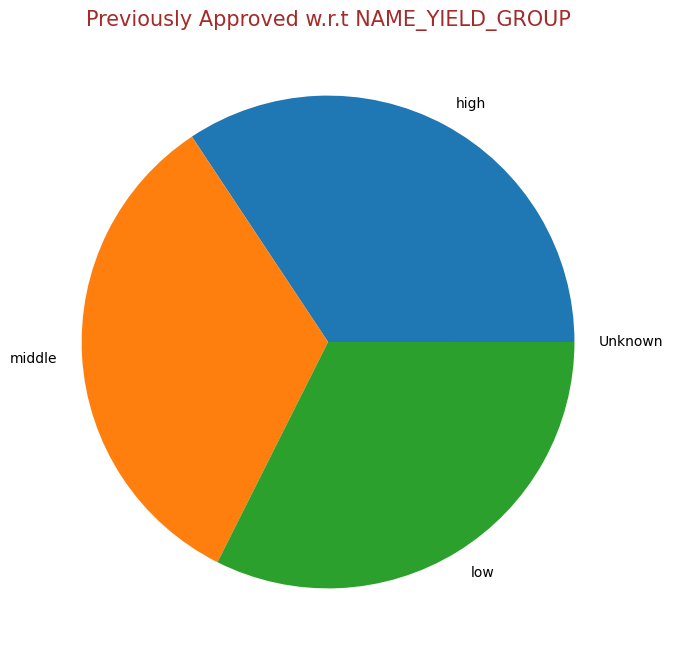

In [221]:
# Plot for all previously approved clients w.r.t previous categorical ordinal variables
for var in PrevOrdinalVars:
    PrevApp_UniPiePlot(var, 'Previously Approved w.r.t '+var)

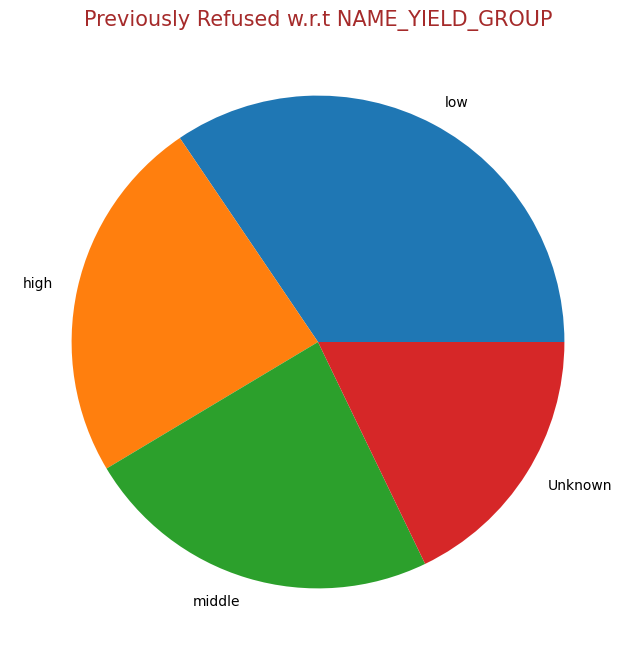

In [222]:
# Plot for all previously refused clients w.r.t previous categorical ordinal variables
for var in PrevOrdinalVars:
    PrevRef_UniPiePlot(var, 'Previously Refused w.r.t '+var)

###### Categorical Unordered Columns (Nominal) univariate analysis

In [223]:
dispCatCols(appl_Merged_df)


There are 15 categorical columns in the dataset


['CASH_LOAN_CATEGORY',
 'CODE_GENDER',
 'CODE_REJECT_REASON',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE_Pres',
 'NAME_CONTRACT_TYPE_Prev',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_YIELD_GROUP',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [224]:
dispCatUniqueVal(appl_Merged_df)

number of unique values in CASH_LOAN_CATEGORY column are: 4

values counts in CASH_LOAN_CATEGORY column are:
CASH_LOAN_CATEGORY
CASH_LOAN_UNKNOWN    953035
CASH_LOAN_REGULAR     26947
CASH_LOAN_MAJOR        8232
CASH_LOAN_LEISURE      1557
Name: count, dtype: int64


number of unique values in CODE_GENDER column are: 2

values counts in CODE_GENDER column are:
CODE_GENDER
F    630043
M    359728
Name: count, dtype: int64


number of unique values in CODE_REJECT_REASON column are: 8

values counts in CODE_REJECT_REASON column are:
CODE_REJECT_REASON
Unknown    815716
HC          86860
LIMIT       35094
SCO         24997
CLIENT      20288
SCOFR        4902
VERIF        1855
SYSTEM         59
Name: count, dtype: int64


number of unique values in FLAG_OWN_CAR column are: 2

values counts in FLAG_OWN_CAR column are:
FLAG_OWN_CAR
N    621115
Y    368656
Name: count, dtype: int64


number of unique values in FLAG_OWN_REALTY column are: 2

values counts in FLAG_OWN_REALTY column are:
FLAG_OWN

In [225]:
# Following columns are categorical unordered type, i.e nominal
# Bar Plot
PresNominalVars = [
                    'CODE_GENDER',
                    'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY',
                    'NAME_CONTRACT_TYPE_Pres',
                    'NAME_FAMILY_STATUS',
                    'NAME_HOUSING_TYPE',
                    'NAME_INCOME_TYPE',
                    'ORGANIZATION_TYPE']

PrevNominalVars = [
                    'CASH_LOAN_CATEGORY',
                    'CODE_REJECT_REASON',
                    'NAME_CONTRACT_STATUS',
                    'NAME_CONTRACT_TYPE_Prev']

In [226]:
def PotRep_UniBarPlot (VariableName, TitleString):
    uniqVals = Potential_Repayers[VariableName].nunique()
    plt.figure(figsize=(uniqVals,5))
    sns.barplot(data=Potential_Repayers[VariableName].value_counts(normalize=True), color='green')
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.ylabel('Normalized Percentage Factor', fontdict={'fontsize': 12,'color': 'blue'})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [227]:
def PotDef_UniBarPlot (VariableName, TitleString):
    uniqVals = Potential_Defaulters[VariableName].nunique()
    plt.figure(figsize=(uniqVals,5), layout='constrained')
    sns.barplot(data=Potential_Defaulters[VariableName].value_counts(normalize=True), color='red')
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.xlabel(VariableName, fontdict={'fontsize': 12,'color': 'blue'})
    plt.ylabel('Normalized Percentage Factor', fontdict={'fontsize': 12,'color': 'blue'})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

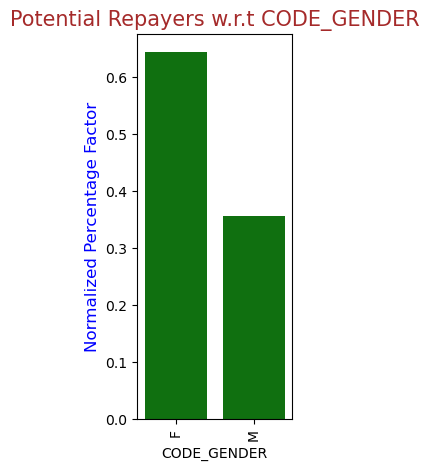

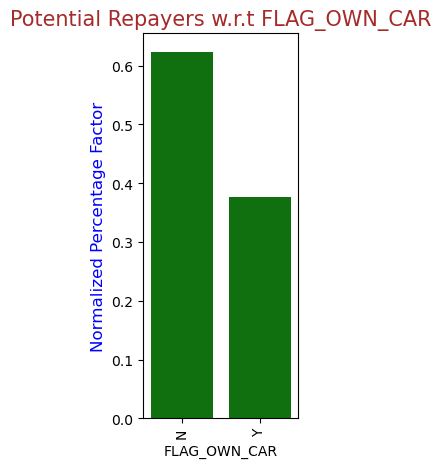

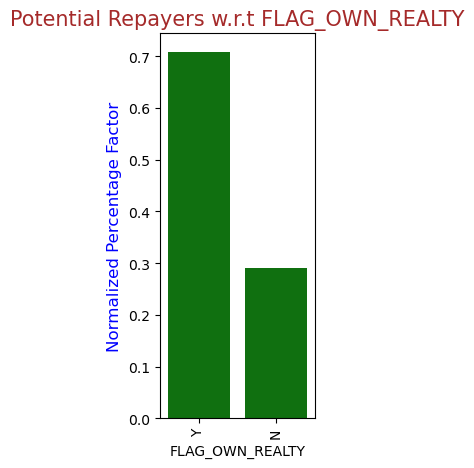

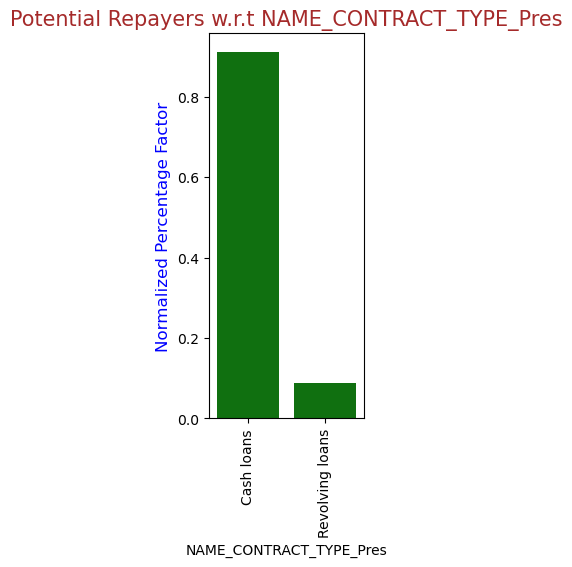

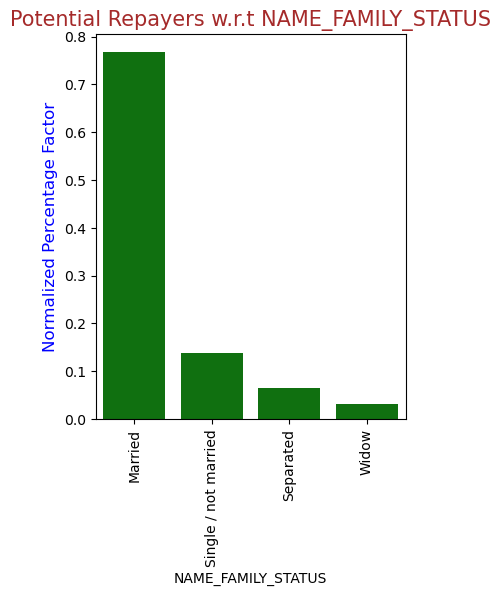

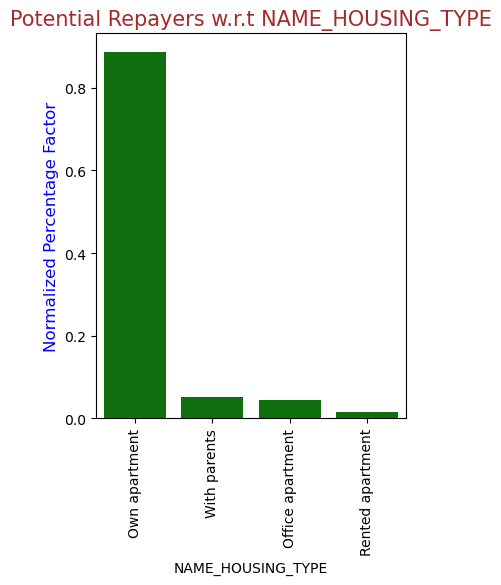

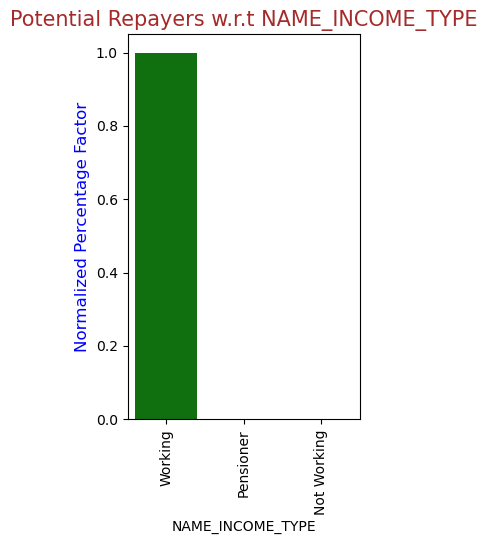

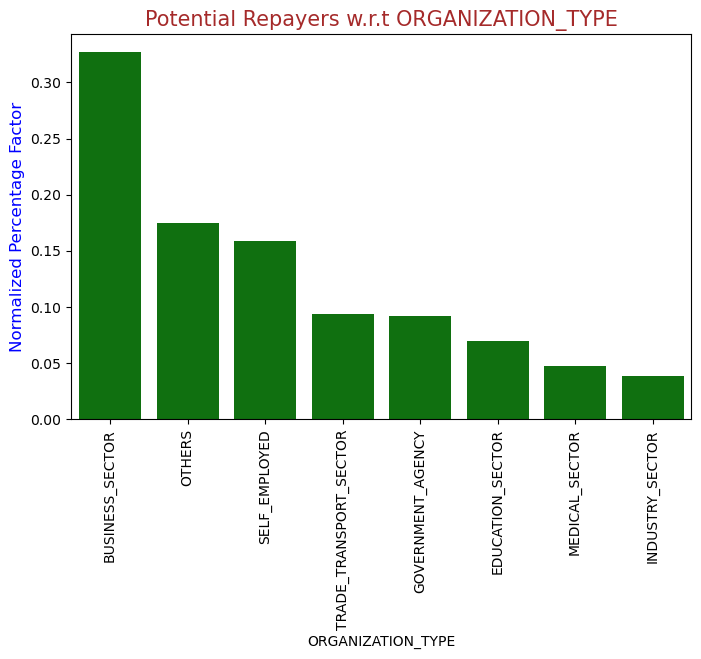

In [228]:
# Plot for all potential repayer clients w.r.t categorical nominal variables
for var in PresNominalVars:
    PotRep_UniBarPlot(var, 'Potential Repayers w.r.t '+var)

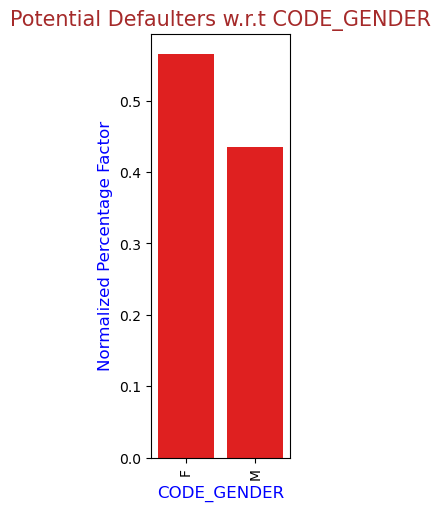

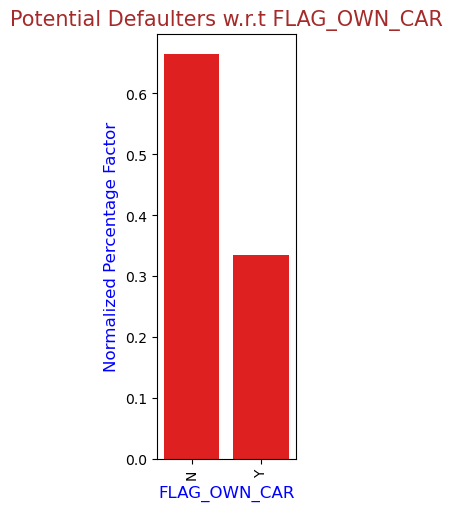

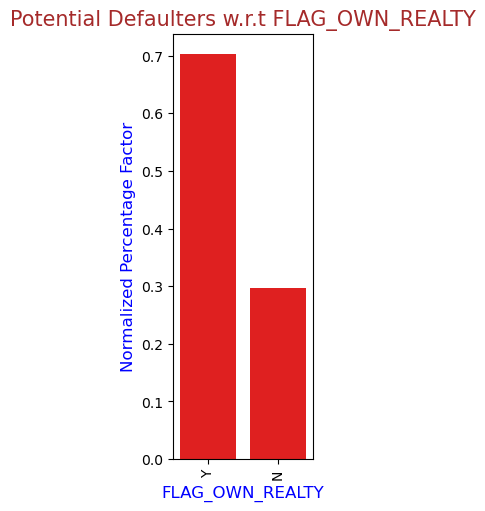

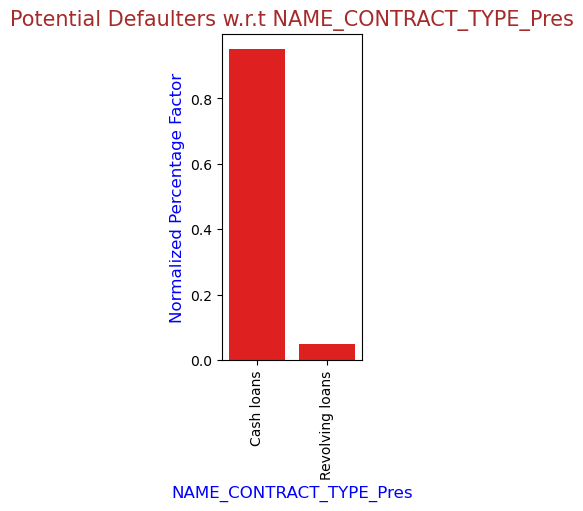

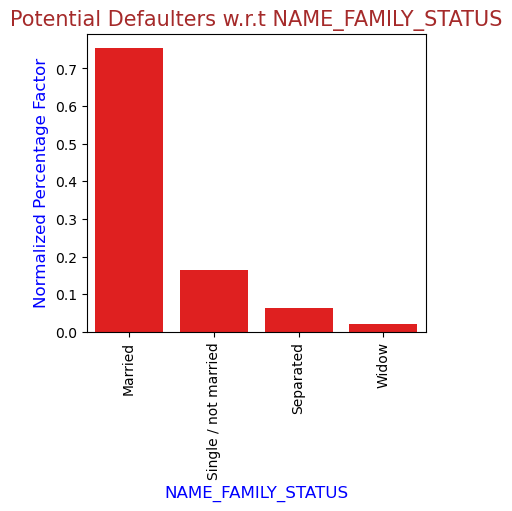

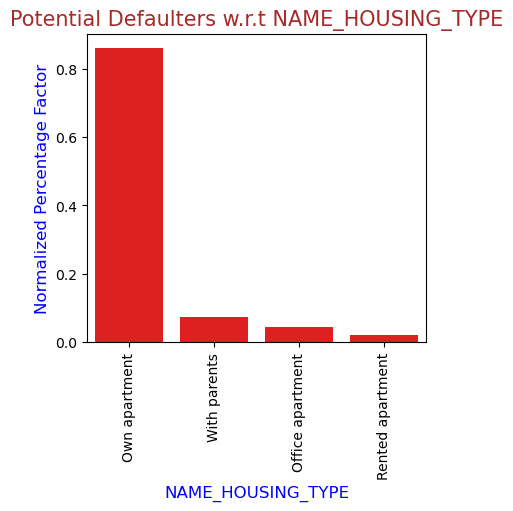

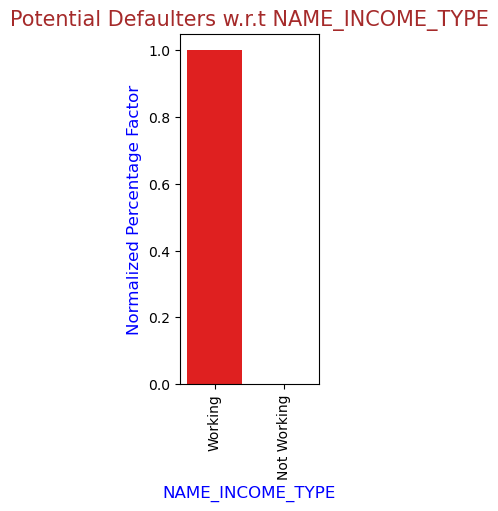

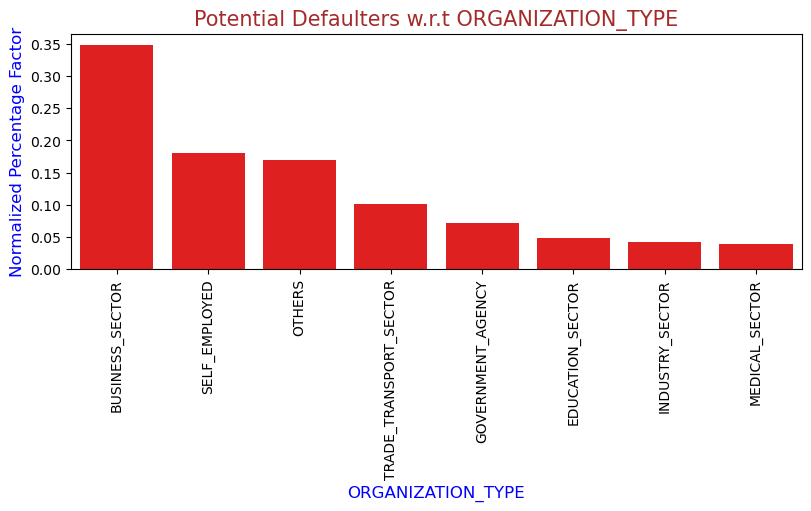

In [229]:
# Plot for all potential defaulter clients w.r.t categorical nominal variables
for var in PresNominalVars:
    PotDef_UniBarPlot(var, 'Potential Defaulters w.r.t '+var)

In [230]:
def PrevApp_UniBarPlot (VariableName, TitleString):
    uniqVals = Previous_Approved[VariableName].nunique()
    plt.figure(figsize=(uniqVals,10))
    sns.barplot(data=Previous_Approved[VariableName].value_counts(normalize=True), color='green')
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.ylabel('Normalized Percentage Factor', fontdict={'fontsize': 12,'color': 'blue'})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [231]:
def PrevRef_UniBarPlot (VariableName, TitleString):
    uniqVals = Previous_Refused[VariableName].nunique()
    plt.figure(figsize=(uniqVals,10), layout='constrained')
    sns.barplot(data=Previous_Refused[VariableName].value_counts(normalize=True), color='red')
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.xlabel(VariableName, fontdict={'fontsize': 12,'color': 'blue'})
    plt.ylabel('Normalized Percentage Factor', fontdict={'fontsize': 12,'color': 'blue'})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

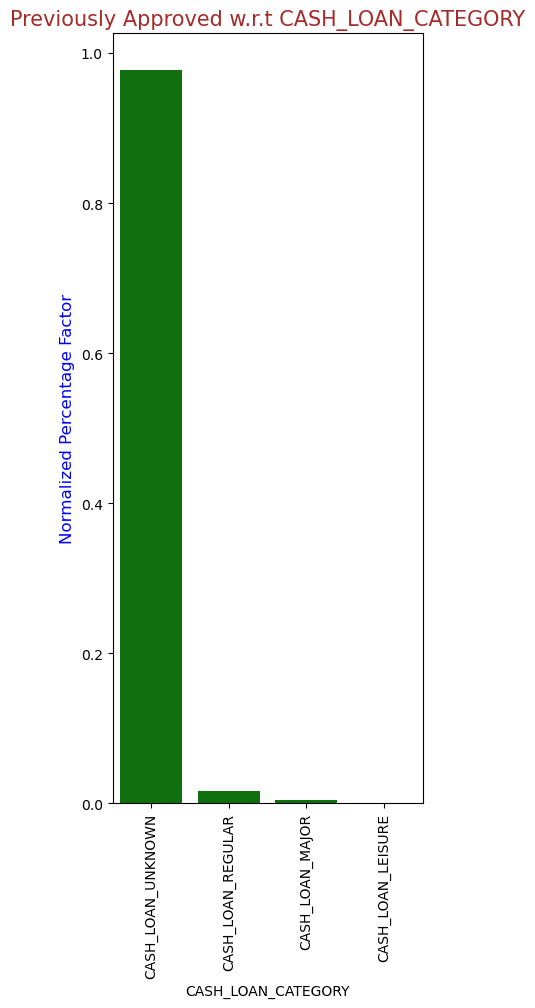

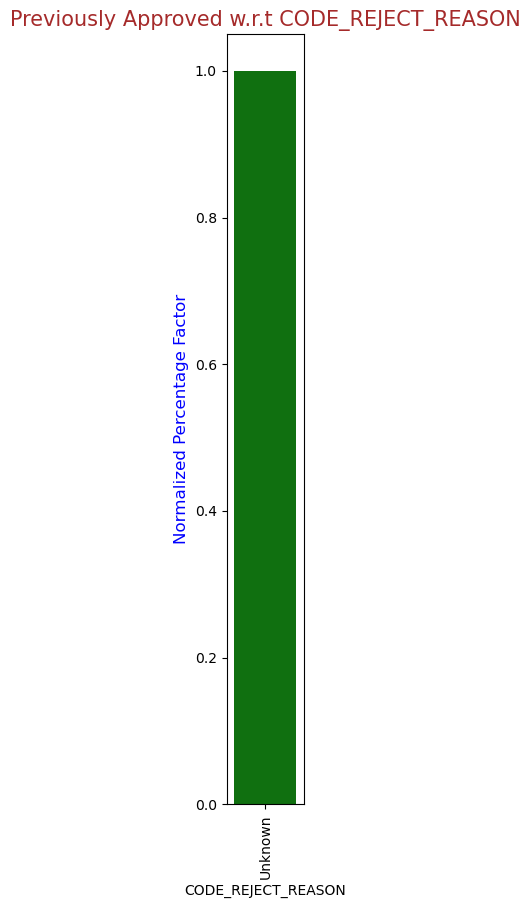

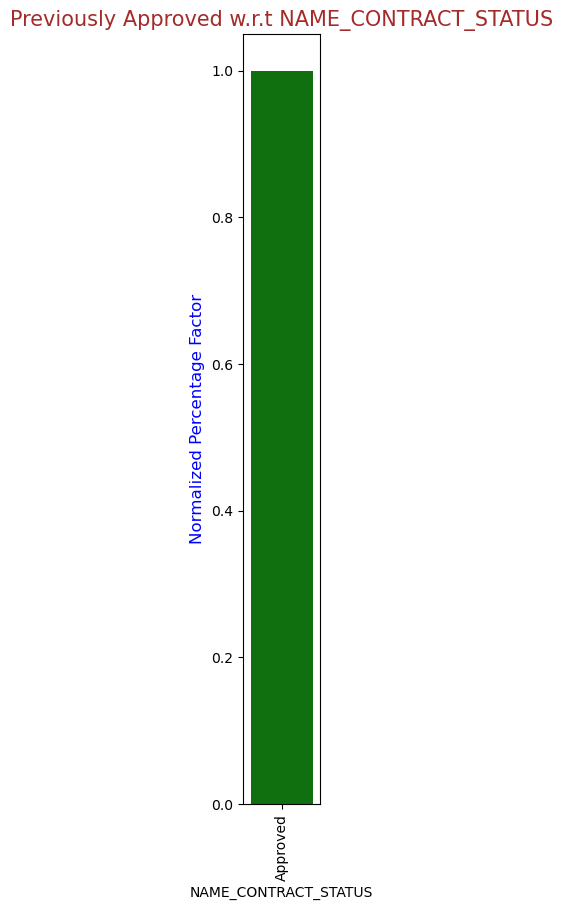

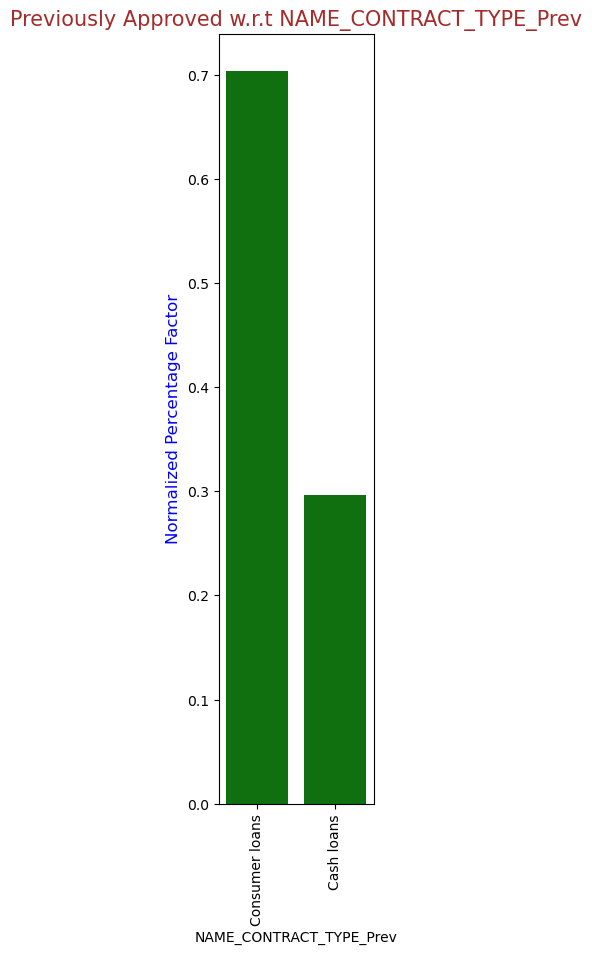

In [232]:
# Plot for all previously approved clients w.r.t categorical nominal variables
for var in PrevNominalVars:
    PrevApp_UniBarPlot(var, 'Previously Approved w.r.t '+var)

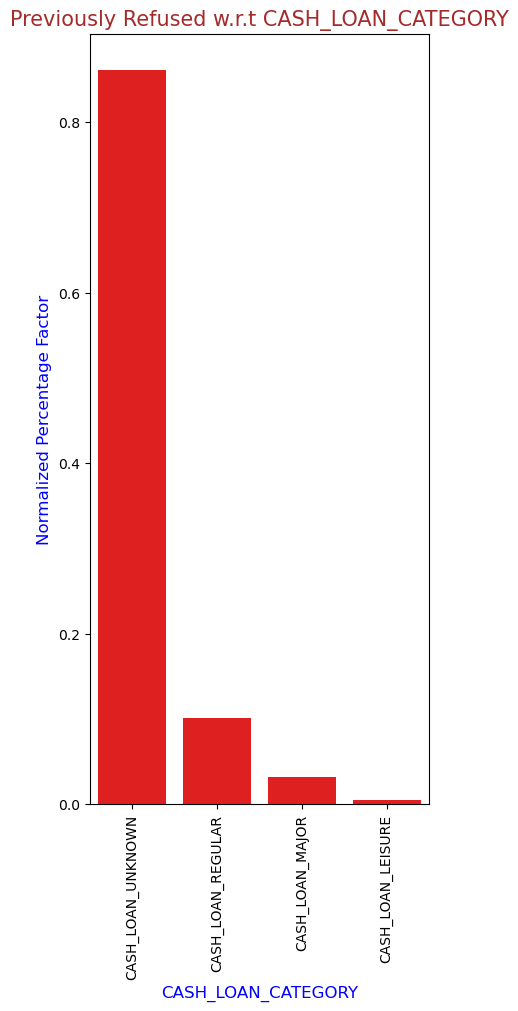

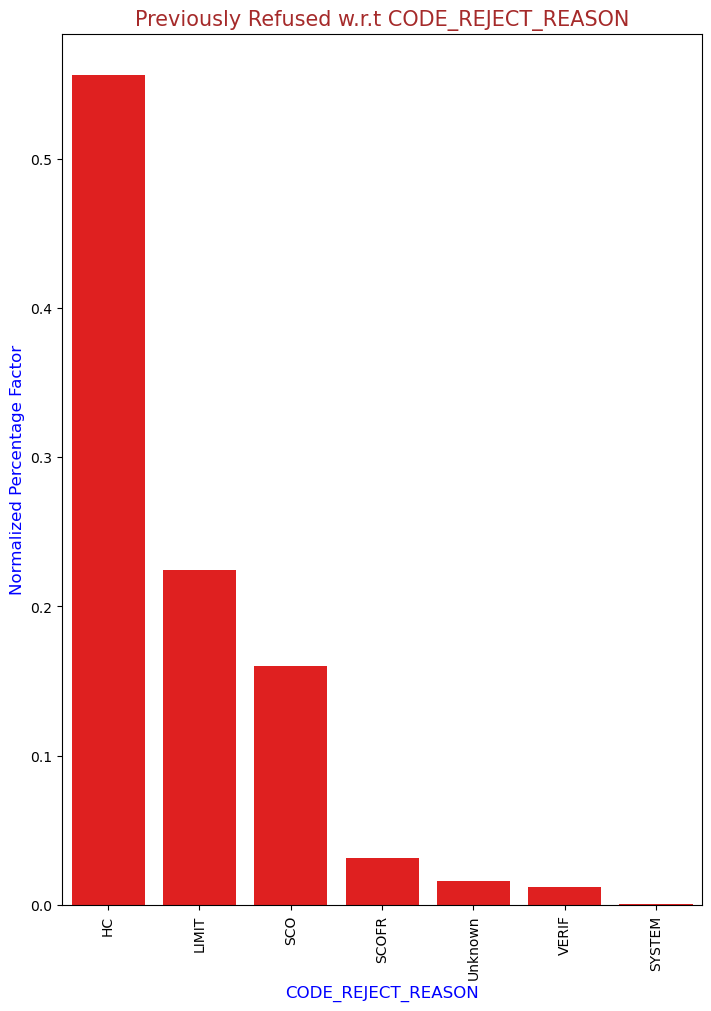

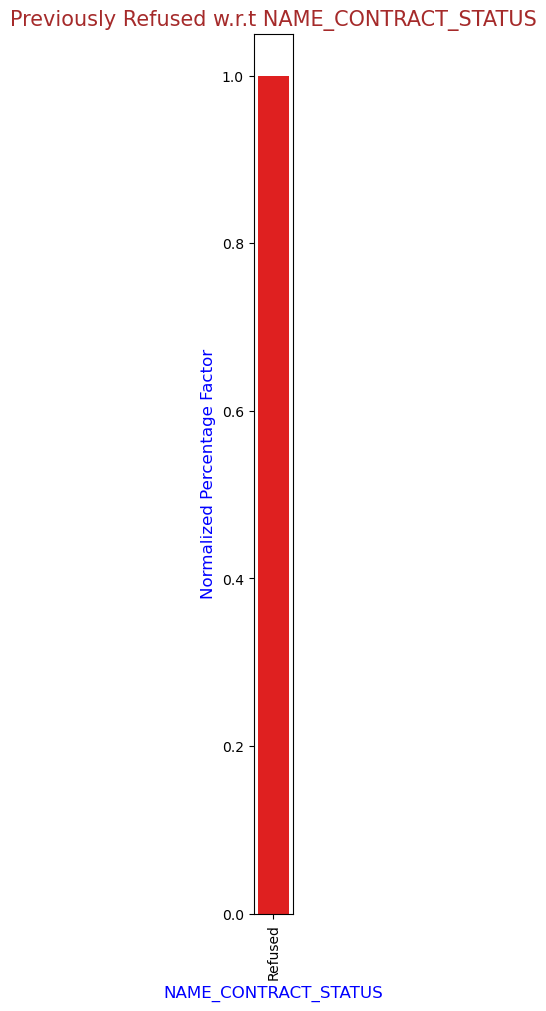

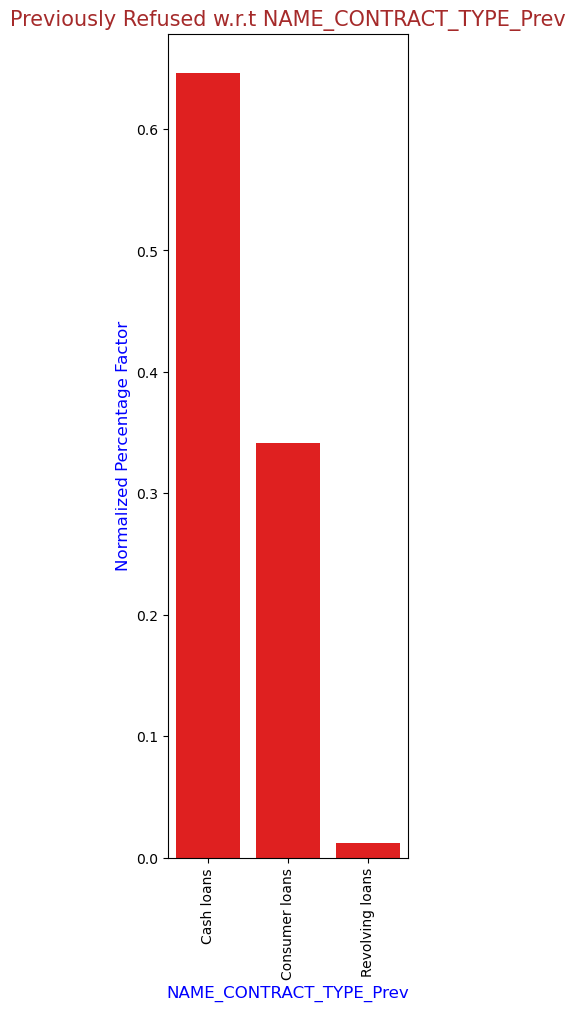

In [233]:
# Plot for all previously refused clients w.r.t categorical nominal variables
for var in PrevNominalVars:
    PrevRef_UniBarPlot(var, 'Previously Refused w.r.t '+var)

#### Bivariate & Multivariate Analysis

In [234]:
numerical_columns

['AGE_YEARS',
 'AMT_ANNUITY_Pres',
 'AMT_ANNUITY_Prev',
 'AMT_CREDIT_Pres',
 'AMT_CREDIT_Prev',
 'AMT_INCOME_TOTAL',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CNT_PAYMENT',
 'EMPL_YEARS',
 'EXT_SOURCES_SCORE',
 'REGION_RATING_AVG',
 'TARGET',
 'LOAN_TARGET']

In [235]:
categorical_columns

['CASH_LOAN_CATEGORY',
 'CODE_GENDER',
 'CODE_REJECT_REASON',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE_Pres',
 'NAME_CONTRACT_TYPE_Prev',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_YIELD_GROUP',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

##### Analysis Between Two Numeric Variables

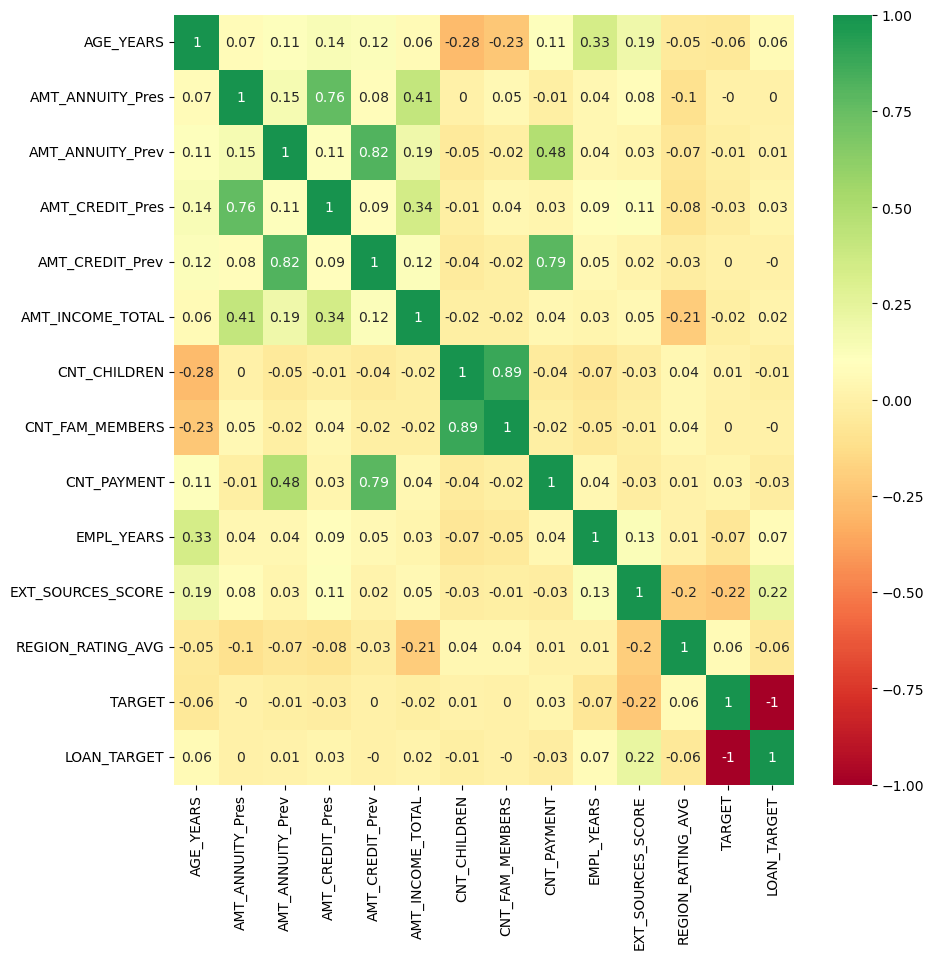

In [236]:
# first compute the correlation between relevant numerical columns
numCorr = appl_Merged_df[numerical_columns].corr()
numCorr = round(numCorr,2)

# Draw a heatmap of numerical columns
plt.figure(figsize=(10,10))
sns.heatmap(data=numCorr, cmap='RdYlGn', annot=True, center=0.1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [237]:
# Correlations Insights:
# TARGET variable doesn't have any noticeable correlation with Family, Income, Employment, Rating information
# Regional Ratings and External scores don't seem to be associated with any other numerical feature
# There is a weak but positive correlation between AGE_YEARS and EMPL_YEARS
# CNT_CHILDREN and CNT_FAM_MEMBERS have a strong positive correlation
# Respective ANNUITY and CREDIT variables are also associated with each other positively
# Previous loan term CNT_PAYMENT has a stronger correlation with respective CREDIT but weaker with ANNUITY
# Income i.e. AMT_TOTAL_INCOME has a fairly positive association with present CREDIT and ANNNUITY variables

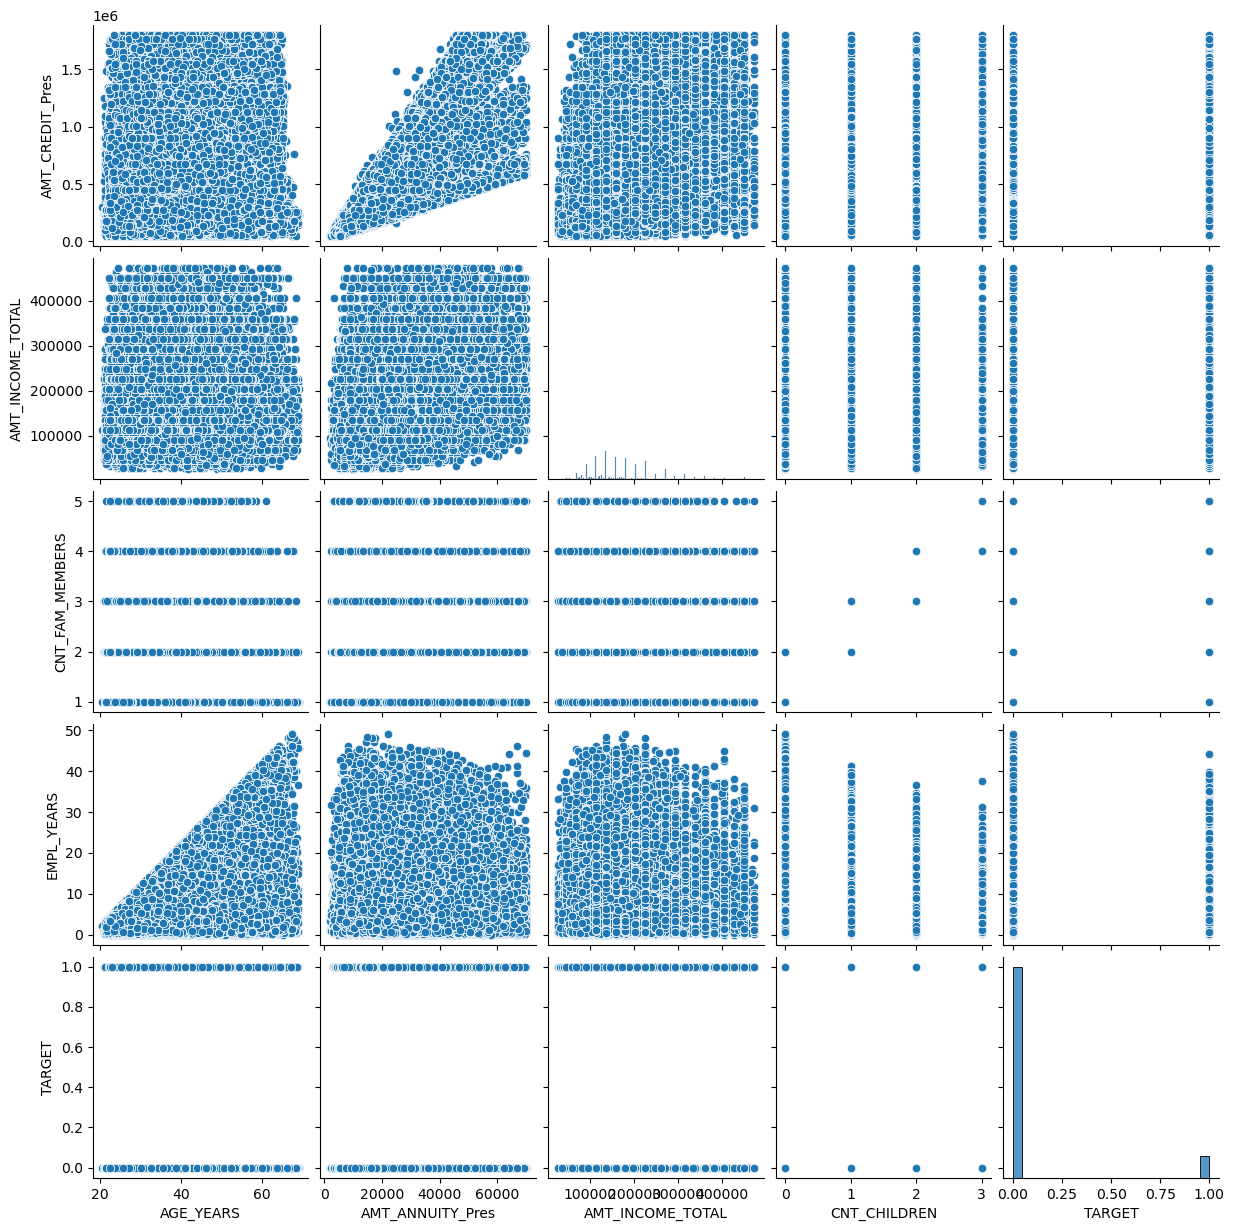

In [238]:
# Draw a pair plot among numerical columns
pairPlot_xVars = [
                'AGE_YEARS',
                'AMT_ANNUITY_Pres',
                'AMT_INCOME_TOTAL',
                'CNT_CHILDREN',
                'TARGET']
pairPlot_yVars = [
                'AMT_CREDIT_Pres',
                'AMT_INCOME_TOTAL',
                'CNT_FAM_MEMBERS',
                'EMPL_YEARS',
                'TARGET']
sns.pairplot(data=appl_Merged_df, x_vars=pairPlot_xVars, y_vars=pairPlot_yVars)
plt.show()

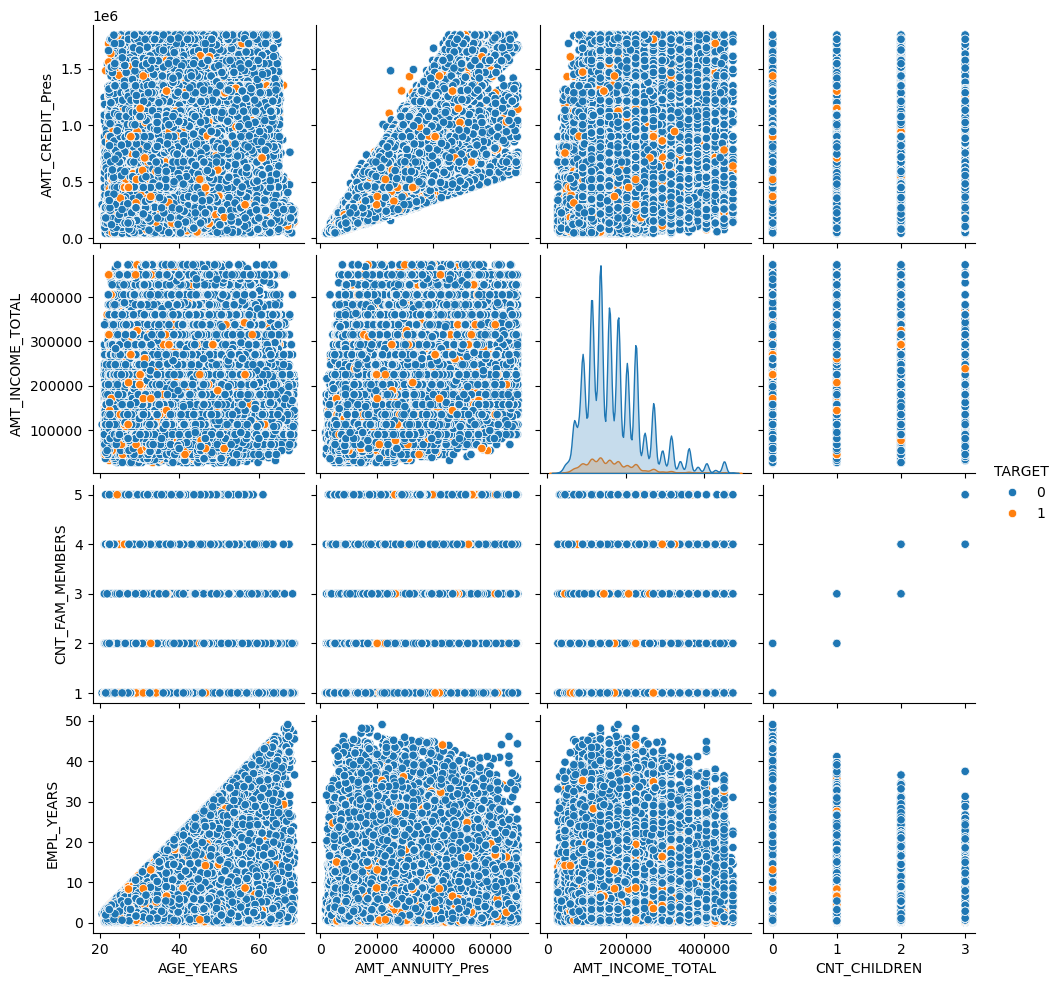

In [239]:
# Draw a pair plot among numerical columns
pairPlot_xVars = [
                'AGE_YEARS',
                'AMT_ANNUITY_Pres',
                'AMT_INCOME_TOTAL',
                'CNT_CHILDREN']
pairPlot_yVars = [
                'AMT_CREDIT_Pres',
                'AMT_INCOME_TOTAL',
                'CNT_FAM_MEMBERS',
                'EMPL_YEARS']
sns.pairplot(data=appl_Merged_df, x_vars=pairPlot_xVars, y_vars=pairPlot_yVars, hue='TARGET')
plt.show()

In [240]:
# Correlations Insights:
# AGE_YEARS and EMPL_YEARS correlated, but not completely linear
# CNT_CHILDREN and CNT_FAM_MEMBERS have a strong positive correlation
# ANNUITY and CREDIT variables correlated fairly positively

##### Analysis Between Numeric and Categorical Variables

In [241]:
# Plot various numerical-categorical feature combinations along with TARGET variable

In [242]:
numerical_columns

['AGE_YEARS',
 'AMT_ANNUITY_Pres',
 'AMT_ANNUITY_Prev',
 'AMT_CREDIT_Pres',
 'AMT_CREDIT_Prev',
 'AMT_INCOME_TOTAL',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CNT_PAYMENT',
 'EMPL_YEARS',
 'EXT_SOURCES_SCORE',
 'REGION_RATING_AVG',
 'TARGET',
 'LOAN_TARGET']

In [243]:
categorical_columns

['CASH_LOAN_CATEGORY',
 'CODE_GENDER',
 'CODE_REJECT_REASON',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE_Pres',
 'NAME_CONTRACT_TYPE_Prev',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_YIELD_GROUP',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [244]:
def BiMuVarBarPlot (x_Var, y_Var, TitleString):
    plt.figure(figsize=(5,5))
    sns.barplot(data=appl_Merged_df, x=x_Var, y=y_Var, hue='TARGET', errorbar=None)
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.xlabel(xlabel=x_Var, fontdict={'fontsize': 12,'color': 'blue'})
    plt.ylabel(ylabel=y_Var, fontdict={'fontsize': 12,'color': 'blue'})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [245]:
def BiMuVarBarHuePlot (x_Var, y_Var, h_Var, TitleString):
    plt.figure(figsize=(5,5))
    sns.barplot(data=appl_Merged_df, x=x_Var, y=y_Var, hue=h_Var, errorbar=None)
    plt.title(TitleString, loc='center',fontdict={'fontsize': 15,'color': 'brown'})
    plt.xlabel(xlabel=x_Var, fontdict={'fontsize': 12,'color': 'blue'})
    plt.ylabel(ylabel=y_Var, fontdict={'fontsize': 12,'color': 'blue'})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

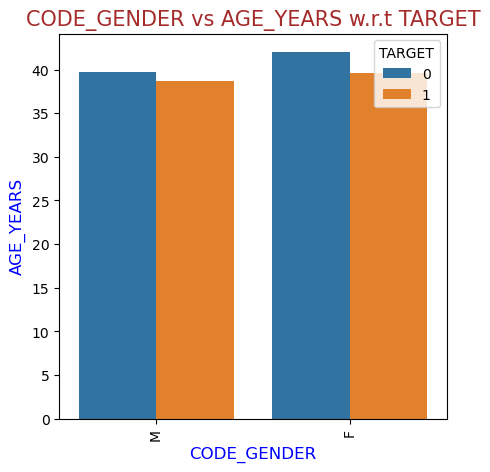

In [246]:
# 'CODE_GENDER vs AGE_YEARS w.r.t TARGET'
BiMuVarBarPlot('CODE_GENDER', 'AGE_YEARS', 'CODE_GENDER vs AGE_YEARS w.r.t TARGET')

In [247]:
# Female applicants have higher chances of repaying loan
# Number of clients able to repay the loan are higher in both genders compared to the ones with difficulties

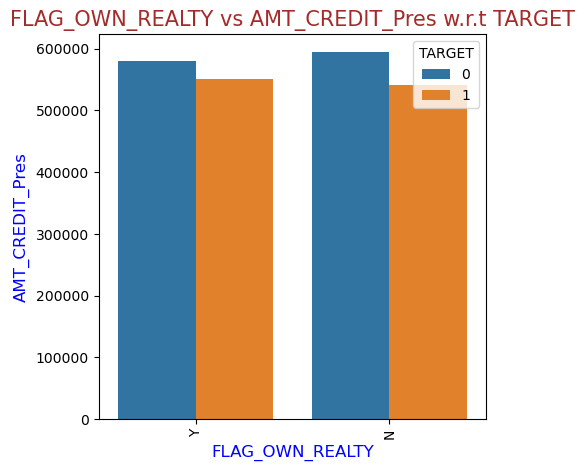

In [248]:
# 'FLAG_OWN_REALTY vs AMT_CREDIT_Pres w.r.t TARGET'
BiMuVarBarPlot('FLAG_OWN_REALTY', 'AMT_CREDIT_Pres', 'FLAG_OWN_REALTY vs AMT_CREDIT_Pres w.r.t TARGET')

In [249]:
# Regardless of a client owning a property or not, avg loan of between 5L to 6L is provided.
# Regardless of a client owning a property or not, there are little higher chances of repaying a loan.

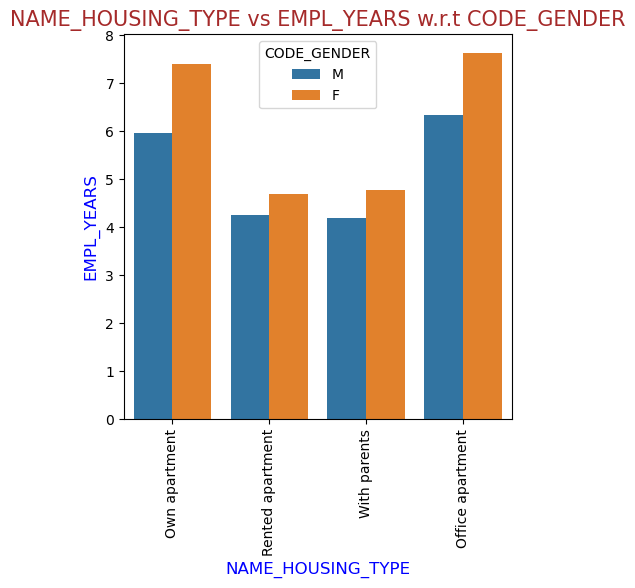

In [250]:
# 'NAME_HOUSING_TYPE vs EMPL_YEARS w.r.t CODE_GENDER'
BiMuVarBarHuePlot('NAME_HOUSING_TYPE','EMPL_YEARS','CODE_GENDER','NAME_HOUSING_TYPE vs EMPL_YEARS w.r.t CODE_GENDER')

In [251]:
# Clients with more experience levels have either their own apartment or office apartment
# Regardless of housing type, female clients have higher experience levels.

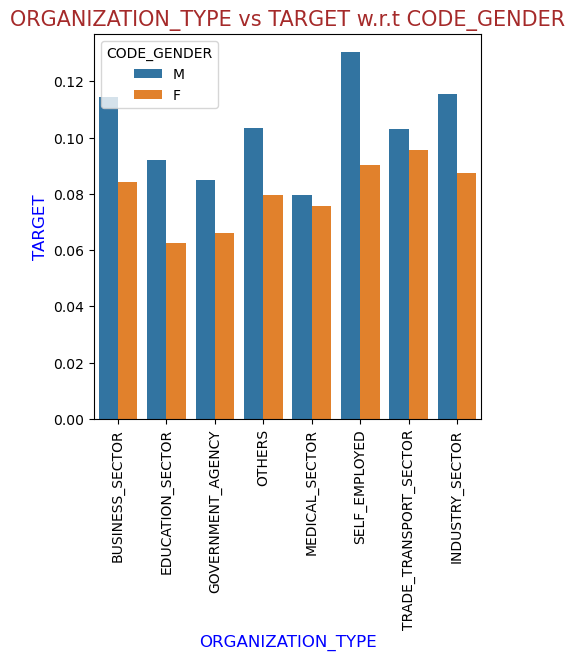

In [252]:
# 'ORGANIZATION_TYPE vs TARGET w.r.t OCCUPTATION_TYPE'
BiMuVarBarHuePlot('ORGANIZATION_TYPE','TARGET','CODE_GENDER','ORGANIZATION_TYPE vs TARGET w.r.t CODE_GENDER')
plt.show()

In [253]:
# Most worthy clients are female clients working in education or government sectors

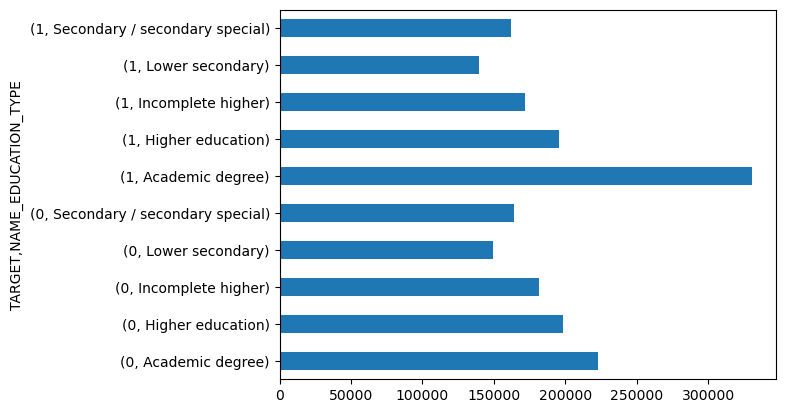

In [254]:
appl_Merged_df.groupby(['TARGET','NAME_EDUCATION_TYPE'])['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.show()

In [255]:
# Highest income is earned by clients with academic degree regardless of their capacity of repaying a loan

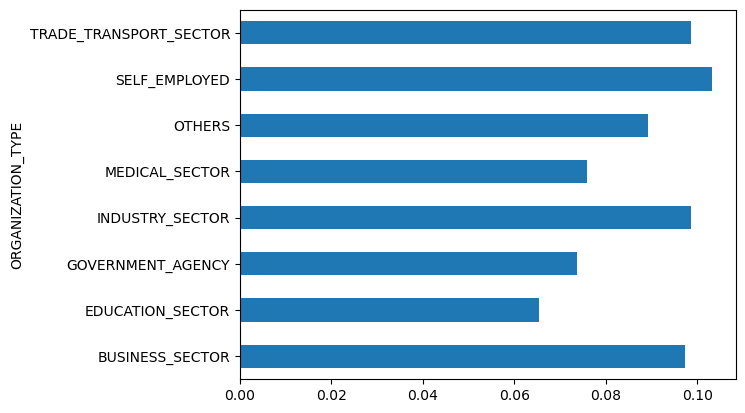

In [256]:
appl_Merged_df.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

In [257]:
# Applicant working education sector have highest chances of repaying a loan

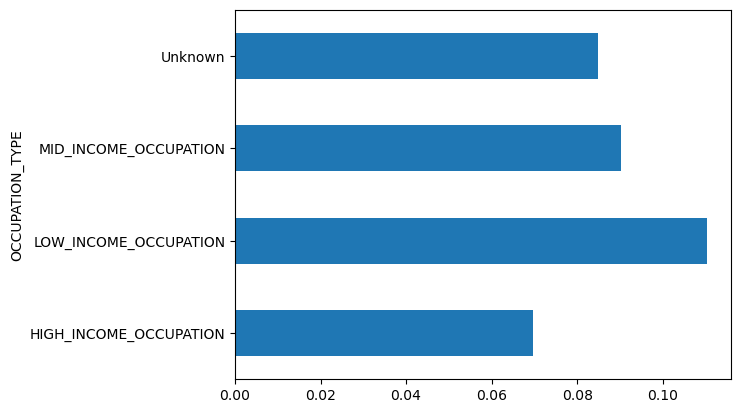

In [258]:
appl_Merged_df.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

In [259]:
# Not so surpsing that the clients in HIGH income occupation are more capable of a loan repayment
# The capability of repayment is inversely associated with the income group
# Lower the income group, higher chances of default

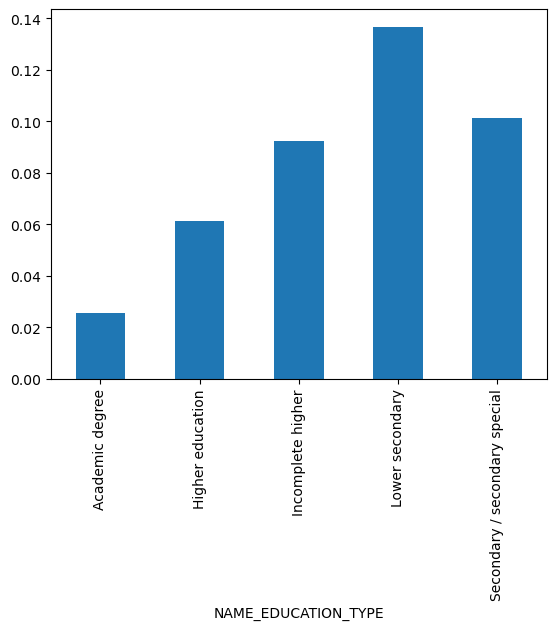

In [260]:
appl_Merged_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

In [261]:
# Applicant who have an academic degree have highest chances of a loan repayment

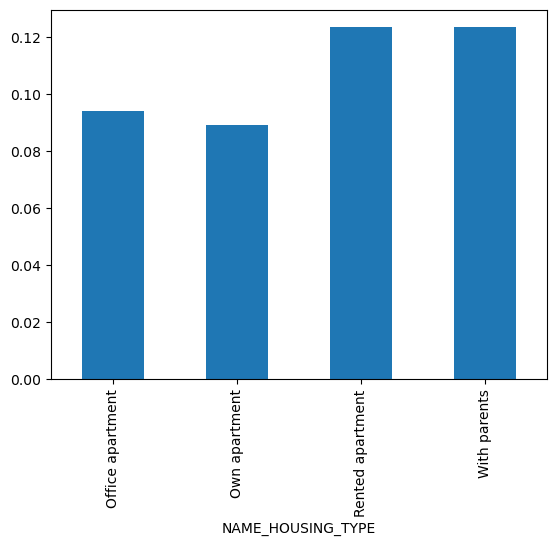

In [262]:
appl_Merged_df.groupby(['NAME_HOUSING_TYPE'])['TARGET'].mean().plot.bar()
plt.show()

In [263]:
# Clients who are either staying in rental or parents' apartment, have higher chances of loan default

##### Analysis Between Two Categorical Variables

In [264]:
# TARGET variable is numerical but it can be treated as a categorical type, and 
# its mean value can be plotted with another categorical variable

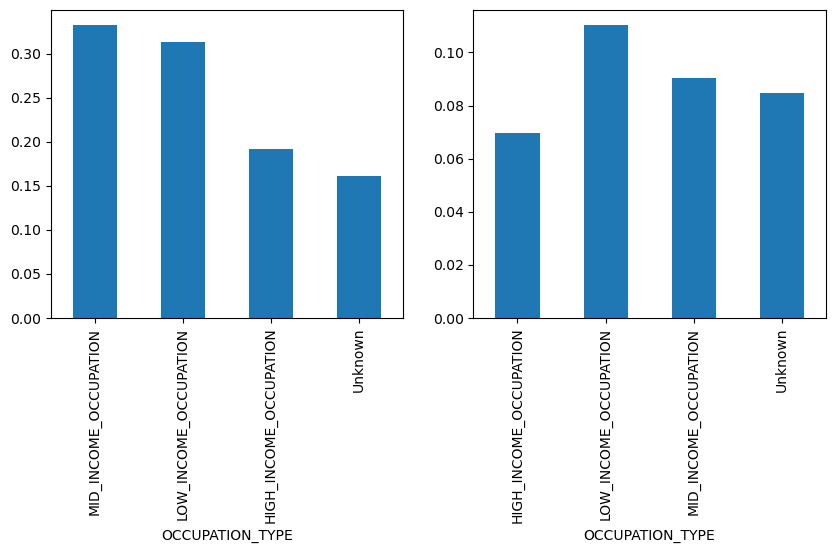

In [265]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
appl_Merged_df.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
# plt.show()
plt.subplot(1,2,2)
appl_Merged_df.groupby('OCCUPATION_TYPE')['TARGET'].mean().plot.bar()
plt.show()

In [266]:
# Clients in high income occupation are relatively low in numbers, but have more chances to repay a loan
# Applicants from low income group are more likely to default

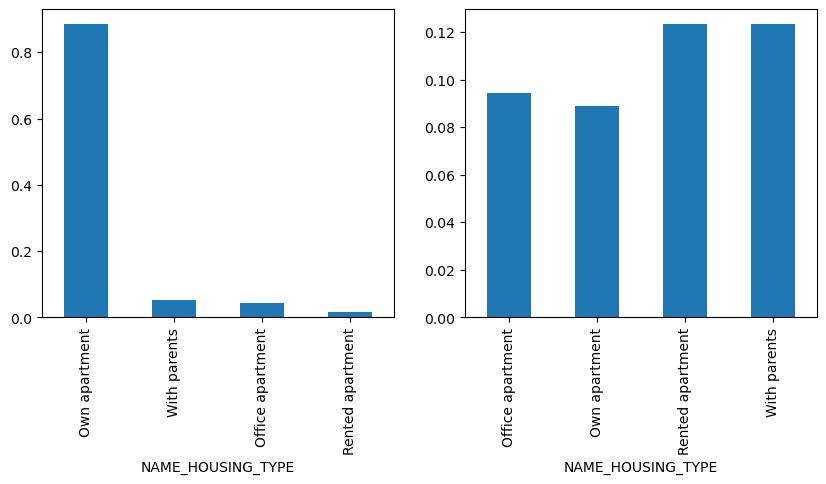

In [267]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
appl_Merged_df.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
# plt.show()
plt.subplot(1,2,2)
appl_Merged_df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot.bar()
plt.show()

In [268]:
# Clients with own house whether it is their own apartment, or office apartment, have higher chances of repaying a loan
# Number of clients with their own apartment is the highest, so there a quite good chance for the lending company to recover loan.

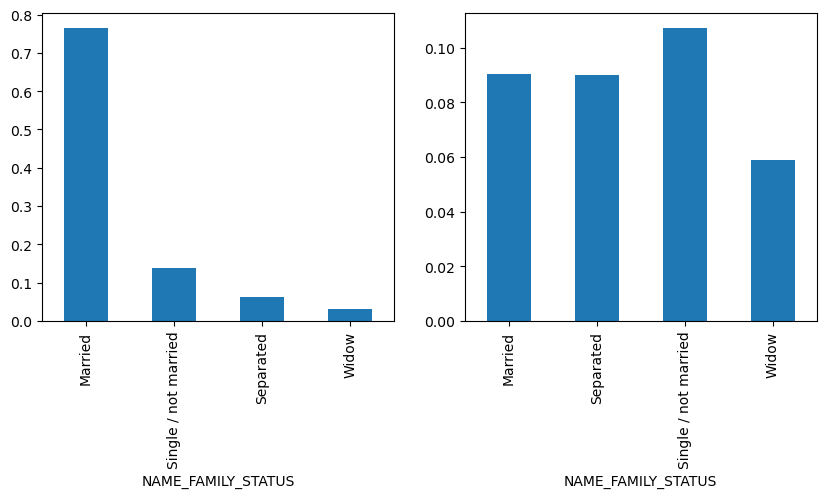

In [269]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
appl_Merged_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
# plt.show()
plt.subplot(1,2,2)
appl_Merged_df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.bar()
plt.show()

In [270]:
# Widow clients have higher probability of repaying a loan, but they are also least in numbers
# Married clients are highest in numbers, but not potentially the best in repaying loan

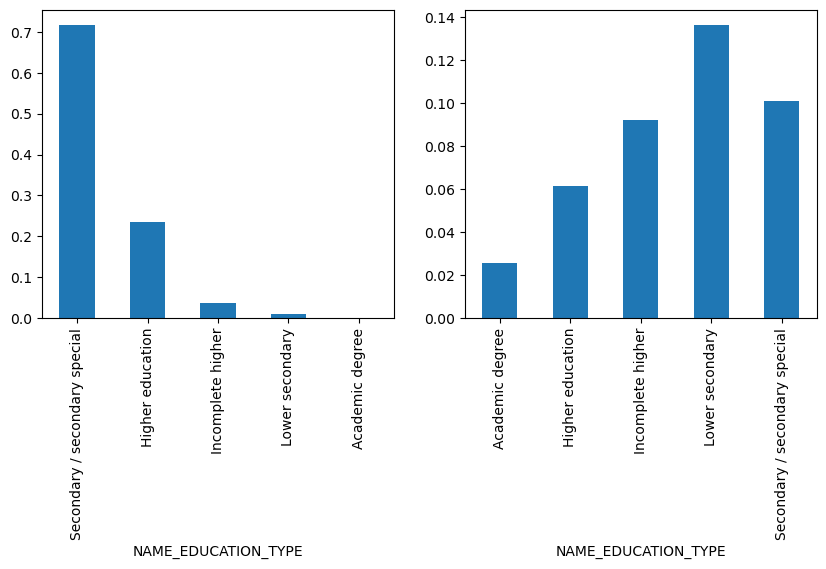

In [271]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
appl_Merged_df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
# plt.show()
plt.subplot(1,2,2)
appl_Merged_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot.bar()
plt.show()

In [272]:
# Applicants with an academic degree are the least in numbers, but seem to be most worthy of a loan
# Clients with secondary education are highest in applicants, however they are not a very good fit for a loan approval

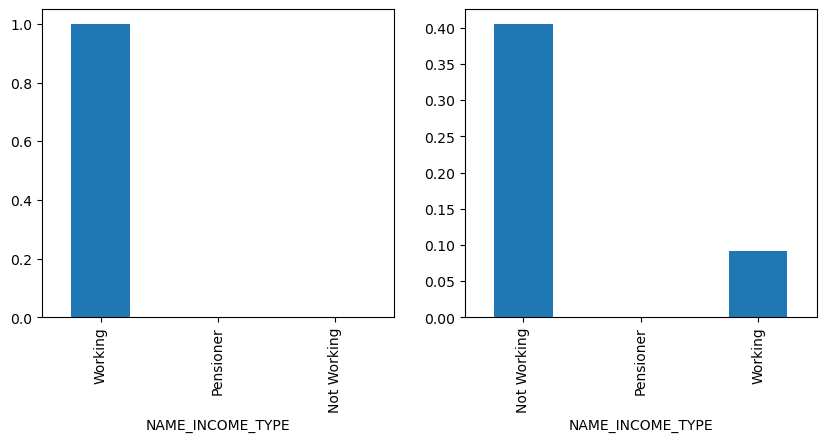

In [273]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
appl_Merged_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
# plt.show()
plt.subplot(1,2,2)
appl_Merged_df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot.bar()
plt.show()

In [274]:
# Clients not employed are the one among the least in numbers, but the worst to get a loan approval
# Working applicants are the highest in numbers and also seem to be relatively better worthy of loan

In [275]:
# Though the number of clients with higher than 5L income is the least, they have the highest chances of repaying the loan

In [276]:
# Lower the loan amount for the application, higher chances are there for a potential default

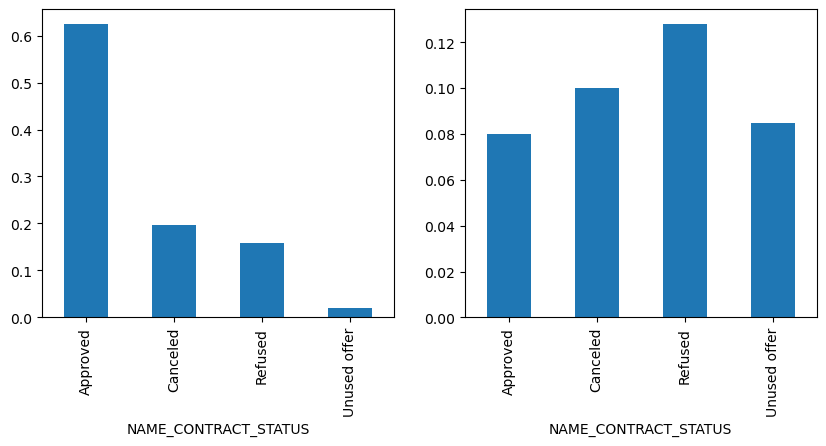

In [277]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
appl_Merged_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
# plt.show()
plt.subplot(1,2,2)
appl_Merged_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().plot.bar()
plt.show()

In [278]:
# Not so surprisingly, the clients whose loan was approved in last application, are more likely to get another loan approved
# Even the clients who had not used the approved loan offer last time, are loan worthy this time.

##### Multivariate Analysis

In [279]:
# Compute correlation between education and occupation type w.r.t a loan worthy client/target
Corr_Education_Occupation = pd.pivot_table(data=appl_Merged_df, index='NAME_EDUCATION_TYPE', columns='OCCUPATION_TYPE', values='LOAN_TARGET')
Corr_Education_Occupation

OCCUPATION_TYPE                HIGH_INCOME_OCCUPATION  LOW_INCOME_OCCUPATION  \
NAME_EDUCATION_TYPE                                                            
Academic degree                              1.000000               1.000000   
Higher education                             0.946688               0.915814   
Incomplete higher                            0.905933               0.904060   
Lower secondary                              0.954407               0.837645   
Secondary / secondary special                0.917181               0.886827   

OCCUPATION_TYPE                MID_INCOME_OCCUPATION   Unknown  
NAME_EDUCATION_TYPE                                             
Academic degree                             0.897727  0.987952  
Higher education                            0.937822  0.941000  
Incomplete higher                           0.911191  0.907971  
Lower secondary                             0.865869  0.898017  
Secondary / secondary special               0.901975  0.905412

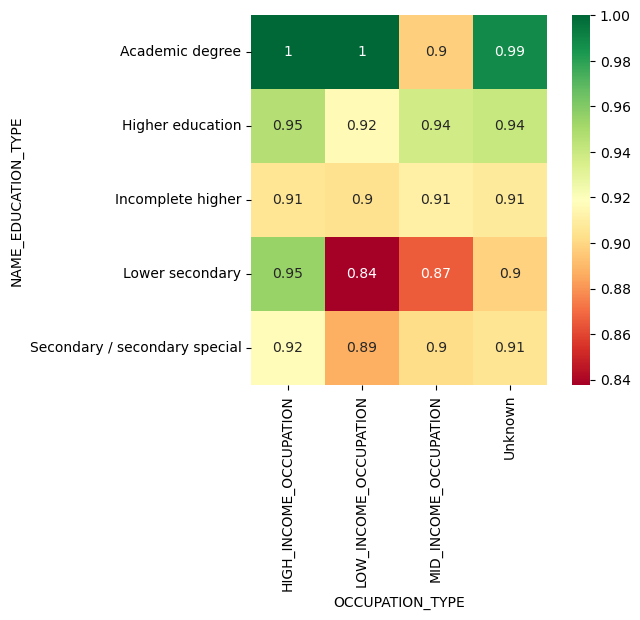

In [280]:
# Plot a heatmap for the correlation between education and occupation type w.r.t a loan worthy client/target
sns.heatmap(Corr_Education_Occupation, annot=True, square=True, cmap='RdYlGn')
plt.show()

In [281]:
# Clients with acdemic degree have higher positive correlation with occupaiton type
# Worst case is the clients with lower secondary education and low or mid income occupation

In [282]:
# Compute correlation between Occupation and organization type w.r.t a loan worthy client/target
Corr_Occupation_Org = pd.pivot_table(data=appl_Merged_df, index='OCCUPATION_TYPE', columns='ORGANIZATION_TYPE', values='LOAN_TARGET')
Corr_Occupation_Org

ORGANIZATION_TYPE       BUSINESS_SECTOR  EDUCATION_SECTOR  GOVERNMENT_AGENCY  \
OCCUPATION_TYPE                                                                
HIGH_INCOME_OCCUPATION         0.926121          0.944601           0.939867   
LOW_INCOME_OCCUPATION          0.885536          0.907940           0.908159   
MID_INCOME_OCCUPATION          0.910780          0.943800           0.925673   
Unknown                        0.910218          0.928083           0.928680   

ORGANIZATION_TYPE       INDUSTRY_SECTOR  MEDICAL_SECTOR    OTHERS  \
OCCUPATION_TYPE                                                     
HIGH_INCOME_OCCUPATION         0.929596        0.944313  0.925099   
LOW_INCOME_OCCUPATION          0.885378        0.887716  0.894078   
MID_INCOME_OCCUPATION          0.929748        0.922077  0.919268   
Unknown                        0.907036        0.940282  0.919346   

ORGANIZATION_TYPE       SELF_EMPLOYED  TRADE_TRANSPORT_SECTOR  
OCCUPATION_TYPE                                                
HIGH_INCOME_OCCUPATION       0.910794                0.921054  
LOW_INCOME_OCCUPATION        0.875966                0.890327  
MID_INCOME_OCCUPATION        0.899963                0.895538  
Unknown                      0.902092                0.917458

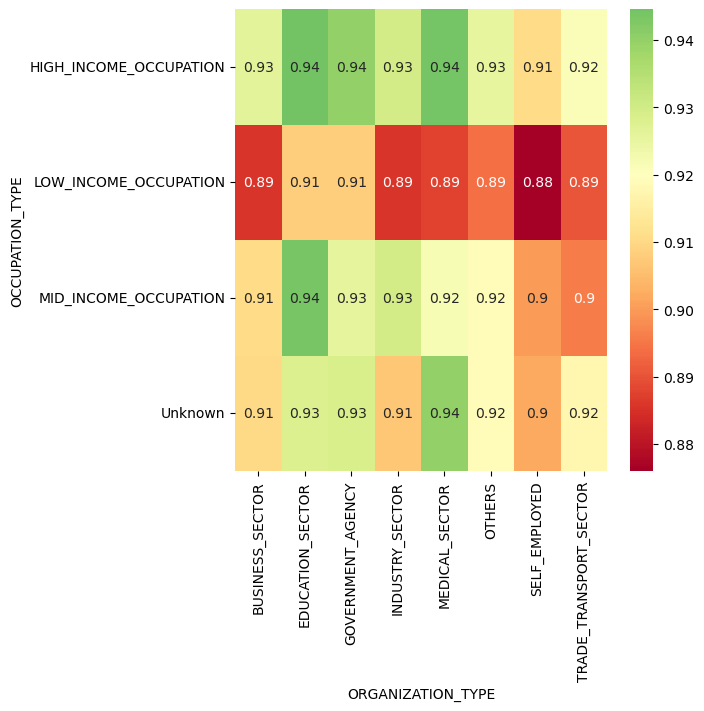

In [283]:
# Plot a heatmap for the correlation between Occupation and income type w.r.t a loan worthy client/target
plt.figure(figsize=(6,6))
sns.heatmap(Corr_Occupation_Org, annot=True, square=False, cmap='RdYlGn', center=0.92)
plt.show()

In [284]:
# Regardless of organization type, clients in low income groups are more likely to default
# Clients working in Education, Government, Industrial and Medical sectors are the ones who are most likely to repay their loan

In [285]:
# Compute correlation between Housing and family w.r.t a loan worthy client/target
Corr_Housing_Family = pd.pivot_table(data=appl_Merged_df, index='NAME_HOUSING_TYPE', columns='NAME_FAMILY_STATUS', values='LOAN_TARGET')
Corr_Housing_Family

NAME_FAMILY_STATUS   Married  Separated  Single / not married     Widow
NAME_HOUSING_TYPE                                                      
Office apartment    0.906290   0.892761              0.894737  0.959939
Own apartment       0.911965   0.914318              0.894787  0.941843
Rented apartment    0.874692   0.885787              0.879488  0.871245
With parents        0.874424   0.876963              0.881353  0.857724

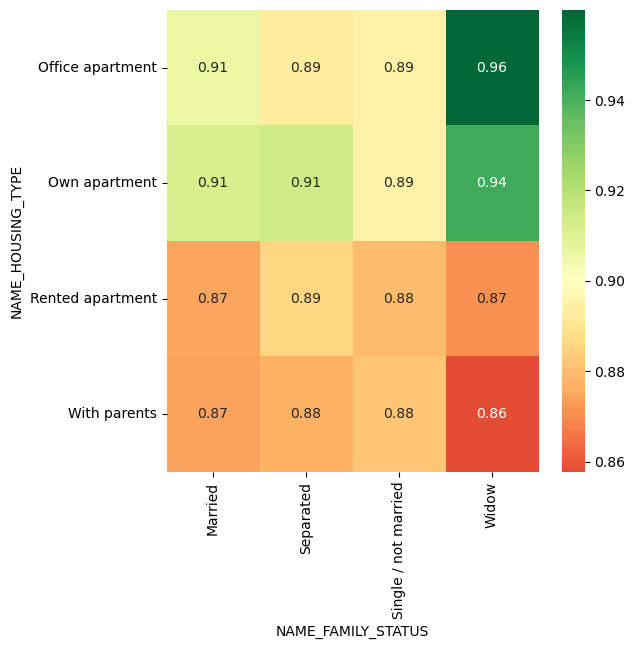

In [286]:
# Plot a heatmap for the correlation between housing and family w.r.t a loan worthy client/target
plt.figure(figsize=(6,6))
sns.heatmap(Corr_Housing_Family, annot=True, square=False, cmap='RdYlGn', center=0.9)
plt.show()

In [287]:
# In general, the clients either staying in a rented apartment or with parents are the least worthy of a loan
# Exceptions among these is the clients staying in own or office apartment who are separated or single
# The worst case of a client not worthy of a loan, would be the one staying with parents and who is a widow